# 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [1]:
#import all libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#path to project folder
path = '/Users/davidey/06-2023 Instacart Basket Analysis'

In [3]:
full_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '2023-07-28_full_merge_final.pkl'))

# 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [4]:
full_merge.shape

(32642450, 31)

In [5]:
full_merge.head()

,order_id,product_id,add_to_cart_order,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_name,aisle_id,...,first_name,last_name,gender,state,age,date_joined,dependants_count,family_status,income,_merge
0,2,33120,1.0,202279,3.0,5.0,9.0,8.0,Organic Egg Whites,86,...,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,both
1,104690,33120,2.0,202279,8.0,6.0,10.0,30.0,Organic Egg Whites,86,...,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,both
2,132412,33120,1.0,202279,6.0,5.0,9.0,30.0,Organic Egg Whites,86,...,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,both
3,2808715,33120,1.0,202279,5.0,5.0,13.0,9.0,Organic Egg Whites,86,...,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,both
4,2894949,33120,5.0,202279,1.0,5.0,9.0,NaN,Organic Egg Whites,86,...,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,both


In [6]:
full_merge.describe()

,add_to_cart_order,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,prices,max_order,user_prices_mean,days_since_mean,age,dependants_count,income
count,3.243624e+07,3.264245e+07,3.264245e+07,3.264245e+07,3.056424e+07,3.240091e+07,3.264245e+07,3.264245e+07,3.264245e+07,3.264245e+07,3.264245e+07,3.264245e+07
mean,8.351150e+00,1.713839e+01,2.739032e+00,1.342599e+01,1.114435e+01,7.790962e+00,3.394187e+01,1.198193e+01,1.141293e+01,4.946533e+01,1.501859e+00,9.940504e+04
std,7.126713e+00,1.752953e+01,2.090264e+00,4.246220e+00,8.806592e+00,4.241739e+00,2.514799e+01,8.356967e+01,6.059639e+00,1.848550e+01,1.118867e+00,4.305326e+04
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,3.000000e+00,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,4.200000e+00,1.400000e+01,7.386667e+00,6.873134e+00,3.300000e+01,1.000000e+00,6.697900e+04
50%,6.000000e+00,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,7.400000e+00,2.700000e+01,7.824615e+00,9.925620e+00,4.900000e+01,2.000000e+00,9.659500e+04
75%,1.100000e+01,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.130000e+01,4.800000e+01,8.254701e+00,1.494495e+01,6.500000e+01,3.000000e+00,1.278650e+05
max,1.450000e+02,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,2.500000e+01,1.000000e+02,2.500542e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [7]:
# Can't see it all, need to make sure all columns visible
pd.options.display.max_columns = None

In [8]:
full_merge.head()

,order_id,product_id,add_to_cart_order,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_prices_mean,spender_category,days_since_mean,frequency_flag,first_name,last_name,gender,state,age,date_joined,dependants_count,family_status,income,_merge
0,2,33120,1.0,202279,3.0,5.0,9.0,8.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,both
1,104690,33120,2.0,202279,8.0,6.0,10.0,30.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,both
2,132412,33120,1.0,202279,6.0,5.0,9.0,30.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,both
3,2808715,33120,1.0,202279,5.0,5.0,13.0,9.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,both
4,2894949,33120,5.0,202279,1.0,5.0,9.0,NaN,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,both


In [9]:
# First and last name could definitely be used to make people identifiable. I will drop those columns

In [10]:
full_merge.drop(columns = ['first_name'])

,order_id,product_id,add_to_cart_order,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_prices_mean,spender_category,days_since_mean,frequency_flag,last_name,gender,state,age,date_joined,dependants_count,family_status,income,_merge
0,2,33120,1.0,202279,3.0,5.0,9.0,8.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,both
1,104690,33120,2.0,202279,8.0,6.0,10.0,30.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,both
2,132412,33120,1.0,202279,6.0,5.0,9.0,30.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,both
3,2808715,33120,1.0,202279,5.0,5.0,13.0,9.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,both
4,2894949,33120,5.0,202279,1.0,5.0,9.0,NaN,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32642445,276317,47210,1.0,66343,3.0,6.0,15.0,19.0,Fresh Farmed Tilapia Fillet,15,12,8.1,Mid-range product,Average days,Most orders,5.0,New customer,8.100000,Low spender,27.250000,Non-frequent customer,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151,both
32642446,484769,47210,1.0,66343,1.0,6.0,11.0,NaN,Fresh Farmed Tilapia Fillet,15,12,8.1,Mid-range product,Average days,Most orders,5.0,New customer,8.100000,Low spender,27.250000,Non-frequent customer,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151,both
32642447,1561557,47210,1.0,66343,2.0,1.0,11.0,30.0,Fresh Farmed Tilapia Fillet,15,12,8.1,Mid-range product,Busiest days,Most orders,5.0,New customer,8.100000,Low spender,27.250000,Non-frequent customer,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151,both
32642448,2922475,47210,1.0,66343,4.0,1.0,12.0,30.0,Fresh Farmed Tilapia Fillet,15,12,8.1,Mid-range product,Busiest days,Most orders,5.0,New customer,8.100000,Low spender,27.250000,Non-frequent customer,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151,both


In [11]:
full_merge.head()

,order_id,product_id,add_to_cart_order,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_prices_mean,spender_category,days_since_mean,frequency_flag,first_name,last_name,gender,state,age,date_joined,dependants_count,family_status,income,_merge
0,2,33120,1.0,202279,3.0,5.0,9.0,8.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,both
1,104690,33120,2.0,202279,8.0,6.0,10.0,30.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,both
2,132412,33120,1.0,202279,6.0,5.0,9.0,30.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,both
3,2808715,33120,1.0,202279,5.0,5.0,13.0,9.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,both
4,2894949,33120,5.0,202279,1.0,5.0,9.0,NaN,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,both


In [12]:
full_merge = full_merge.drop(columns = ['first_name'])

In [13]:
full_merge = full_merge.drop(columns = ['last_name'])

In [14]:
#check if PII is gone
full_merge.head()

,order_id,product_id,add_to_cart_order,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_prices_mean,spender_category,days_since_mean,frequency_flag,gender,state,age,date_joined,dependants_count,family_status,income,_merge
0,2,33120,1.0,202279,3.0,5.0,9.0,8.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,both
1,104690,33120,2.0,202279,8.0,6.0,10.0,30.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,both
2,132412,33120,1.0,202279,6.0,5.0,9.0,30.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,both
3,2808715,33120,1.0,202279,5.0,5.0,13.0,9.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,both
4,2894949,33120,5.0,202279,1.0,5.0,9.0,NaN,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,both


Looks good!

# 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [15]:
# see all states covered and their value counts
full_merge['state'].value_counts(dropna=False)

Pennsylvania            671793
California              664517
Rhode Island            661727
Georgia                 661161
New Mexico              659236
Arizona                 658638
North Carolina          656400
Oklahoma                656339
Alaska                  653094
Minnesota               652493
Massachusetts           651083
Wyoming                 648998
Virginia                646157
Missouri                645395
Texas                   645132
Colorado                643877
Maine                   643228
North Dakota            643056
Alabama                 642732
Louisiana               642246
Kansas                  642096
Delaware                641546
South Carolina          641480
Oregon                  641026
Arkansas                640795
New York                640770
Nevada                  640764
Montana                 639896
South Dakota            638419
Illinois                637555
Washington              637513
Hawaii                  637511
Mississi

In [16]:
# checking over
full_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32642450 entries, 0 to 32642449
Data columns (total 29 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                object  
 1   product_id              object  
 2   add_to_cart_order       float64 
 3   user_id                 object  
 4   user_order_number       float64 
 5   orders_day_of_week      float64 
 6   order_hour_of_day       float64 
 7   days_since_prior_order  float64 
 8   product_name            object  
 9   aisle_id                object  
 10  department_id           object  
 11  prices                  float64 
 12  price_range_loc         object  
 13  busiest_days            object  
 14  busiest_period_of_day   object  
 15  max_order               float64 
 16  loyalty_flag            object  
 17  user_prices_mean        float64 
 18  spender_category        object  
 19  days_since_mean         float64 
 20  frequency_flag          object  
 21  gender

In [17]:
full_merge.describe()

,add_to_cart_order,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,prices,max_order,user_prices_mean,days_since_mean,age,dependants_count,income
count,3.243624e+07,3.264245e+07,3.264245e+07,3.264245e+07,3.056424e+07,3.240091e+07,3.264245e+07,3.264245e+07,3.264245e+07,3.264245e+07,3.264245e+07,3.264245e+07
mean,8.351150e+00,1.713839e+01,2.739032e+00,1.342599e+01,1.114435e+01,7.790962e+00,3.394187e+01,1.198193e+01,1.141293e+01,4.946533e+01,1.501859e+00,9.940504e+04
std,7.126713e+00,1.752953e+01,2.090264e+00,4.246220e+00,8.806592e+00,4.241739e+00,2.514799e+01,8.356967e+01,6.059639e+00,1.848550e+01,1.118867e+00,4.305326e+04
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,3.000000e+00,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,4.200000e+00,1.400000e+01,7.386667e+00,6.873134e+00,3.300000e+01,1.000000e+00,6.697900e+04
50%,6.000000e+00,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,7.400000e+00,2.700000e+01,7.824615e+00,9.925620e+00,4.900000e+01,2.000000e+00,9.659500e+04
75%,1.100000e+01,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.130000e+01,4.800000e+01,8.254701e+00,1.494495e+01,6.500000e+01,3.000000e+00,1.278650e+05
max,1.450000e+02,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,2.500000e+01,1.000000e+02,2.500542e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [18]:
Northeast = ["Maine", "New Hampshire", "Vermont", "Massachusetts", "Rhode Island", "Connecticut", "New York", "Pennsylvania", "New Jersey"]

In [19]:
Midwest = ["Wisconsin", "Michigan", "Illinois", "Indiana", "Ohio", "North Dakota", "South Dakota", "Nebraska", "Kansas", "Minnesota", "Iowa", "Missouri"]

In [20]:
South = ["Delaware", "Maryland", "District of Columbia", "Virginia", "West Virginia", "North Carolina", "South Carolina", "Georgia", "Florida", "Kentucky", "Tennessee", "Mississippi", "Alabama", "Oklahoma", "Texas", "Arkansas", "Louisiana"]

In [21]:
West = ["Idaho", "Montana", "Wyoming", "Nevada", "Utah", "Colorado", "Arizona", "New Mexico", "Alaska", "Washington", "Oregon", "California", "Hawaii"]

In [22]:
result = []

for value in full_merge["state"]:
    if value in Northeast:
        result.append("Northeast")
    elif value in Midwest:
        result.append("Midwest")
    elif value in South:
        result.append("South")
    else:
        result.append("West")

In [23]:
result

['West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 

In [24]:
full_merge['region'] = result

In [25]:
full_merge['region'].value_counts(dropna = False)

South        10871134
West          8353486
Midwest       7652795
Northeast     5765035
Name: region, dtype: int64

## Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [26]:
crosstab = pd.crosstab(full_merge['region'], full_merge['spender_category'], dropna = False)

In [27]:
crosstab.to_clipboard()

In [28]:
crosstab

spender_category,High spender,Low spender
region,,
Midwest,157351,7495444
Northeast,109160,5655875
South,211697,10659437
West,161834,8191652


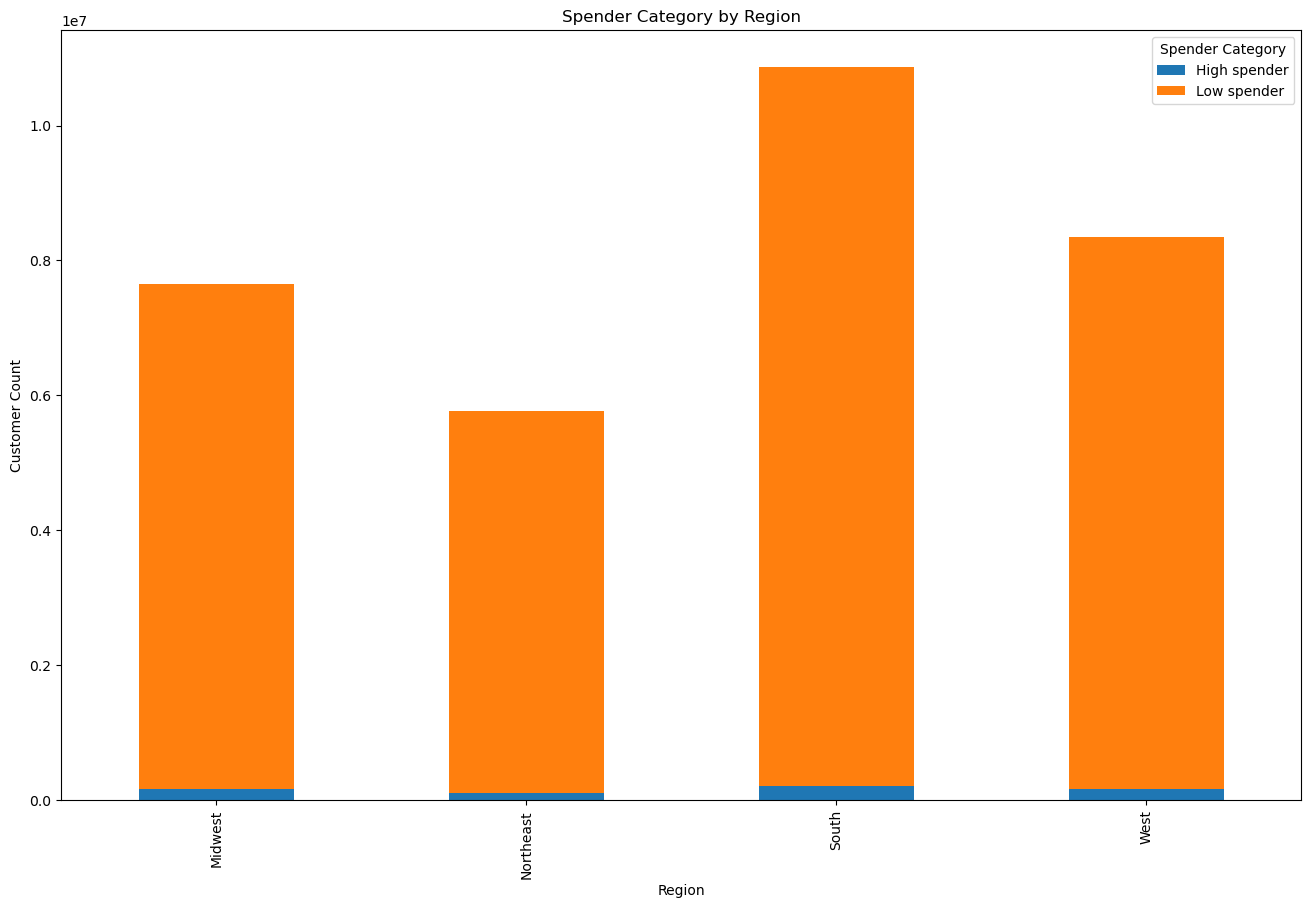

In [29]:
#specify stacked chart
regionspenders = crosstab.plot.bar(stacked=True, figsize=(16, 10))

# set labels and titles
plt.legend(title='Spender Category')
plt.xlabel('Region')
plt.ylabel('Customer Count')
plt.title('Spender Category by Region')

# display the chart
plt.show()

The proportions of high to low spenders within a region are similar across all regions. The south is by far the largest region, whereas the west and midwest are of similar size. The northeast is the smallest region.

# 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [30]:
# designate low spenders
full_merge.loc[full_merge['max_order'] < 5, 'low_activity'] = True

In [31]:
full_merge.head()

,order_id,product_id,add_to_cart_order,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_prices_mean,spender_category,days_since_mean,frequency_flag,gender,state,age,date_joined,dependants_count,family_status,income,_merge,region,low_activity
0,2,33120,1.0,202279,3.0,5.0,9.0,8.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,both,West,NaN
1,104690,33120,2.0,202279,8.0,6.0,10.0,30.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,both,West,NaN
2,132412,33120,1.0,202279,6.0,5.0,9.0,30.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,both,West,NaN
3,2808715,33120,1.0,202279,5.0,5.0,13.0,9.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,both,West,NaN
4,2894949,33120,5.0,202279,1.0,5.0,9.0,NaN,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,both,West,NaN


In [32]:
#create low activity dataframe
low_spenders = full_merge[full_merge['low_activity']==True]

In [33]:
#export low activity dataframe
low_spenders.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity.pkl'))

In [34]:
#designate dataframe without low activity
full_merge2 = full_merge[full_merge['low_activity']!=True]

In [35]:
full_merge2.head()

,order_id,product_id,add_to_cart_order,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_prices_mean,spender_category,days_since_mean,frequency_flag,gender,state,age,date_joined,dependants_count,family_status,income,_merge,region,low_activity
0,2,33120,1.0,202279,3.0,5.0,9.0,8.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,both,West,NaN
1,104690,33120,2.0,202279,8.0,6.0,10.0,30.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,both,West,NaN
2,132412,33120,1.0,202279,6.0,5.0,9.0,30.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,both,West,NaN
3,2808715,33120,1.0,202279,5.0,5.0,13.0,9.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,both,West,NaN
4,2894949,33120,5.0,202279,1.0,5.0,9.0,NaN,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,both,West,NaN


In [36]:
full_merge2.shape

(31931134, 31)

In [37]:
full_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31931134 entries, 0 to 32642449
Data columns (total 31 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                object  
 1   product_id              object  
 2   add_to_cart_order       float64 
 3   user_id                 object  
 4   user_order_number       float64 
 5   orders_day_of_week      float64 
 6   order_hour_of_day       float64 
 7   days_since_prior_order  float64 
 8   product_name            object  
 9   aisle_id                object  
 10  department_id           object  
 11  prices                  float64 
 12  price_range_loc         object  
 13  busiest_days            object  
 14  busiest_period_of_day   object  
 15  max_order               float64 
 16  loyalty_flag            object  
 17  user_prices_mean        float64 
 18  spender_category        object  
 19  days_since_mean         float64 
 20  frequency_flag          object  
 21  gender

In [38]:
full_merge2.head()

,order_id,product_id,add_to_cart_order,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_prices_mean,spender_category,days_since_mean,frequency_flag,gender,state,age,date_joined,dependants_count,family_status,income,_merge,region,low_activity
0,2,33120,1.0,202279,3.0,5.0,9.0,8.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,both,West,NaN
1,104690,33120,2.0,202279,8.0,6.0,10.0,30.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,both,West,NaN
2,132412,33120,1.0,202279,6.0,5.0,9.0,30.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,both,West,NaN
3,2808715,33120,1.0,202279,5.0,5.0,13.0,9.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,both,West,NaN
4,2894949,33120,5.0,202279,1.0,5.0,9.0,NaN,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,both,West,NaN


In [39]:
#can safely drop the low_activity column, and the merge column
full_merge2 = full_merge2.drop(columns = ['low_activity'])

In [40]:
full_merge2 = full_merge2.drop(columns = ['_merge'])

# 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [41]:
full_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31931134 entries, 0 to 32642449
Data columns (total 29 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                object 
 1   product_id              object 
 2   add_to_cart_order       float64
 3   user_id                 object 
 4   user_order_number       float64
 5   orders_day_of_week      float64
 6   order_hour_of_day       float64
 7   days_since_prior_order  float64
 8   product_name            object 
 9   aisle_id                object 
 10  department_id           object 
 11  prices                  float64
 12  price_range_loc         object 
 13  busiest_days            object 
 14  busiest_period_of_day   object 
 15  max_order               float64
 16  loyalty_flag            object 
 17  user_prices_mean        float64
 18  spender_category        object 
 19  days_since_mean         float64
 20  frequency_flag          object 
 21  gender                  objec

In [42]:
pd.options.display.max_columns = None

In [43]:
full_merge2.describe()

,add_to_cart_order,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,prices,max_order,user_prices_mean,days_since_mean,age,dependants_count,income
count,3.174891e+07,3.193113e+07,3.193113e+07,3.193113e+07,3.008061e+07,3.171428e+07,3.193113e+07,3.193113e+07,3.193113e+07,3.193113e+07,3.193113e+07,3.193113e+07
mean,8.356316e+00,1.747402e+01,2.740338e+00,1.341951e+01,1.100351e+01,7.790886e+00,3.460887e+01,1.196155e+01,1.122463e+01,4.946706e+01,1.501825e+00,9.953331e+04
std,7.131015e+00,1.757678e+01,2.089910e+00,4.247644e+00,8.711368e+00,4.241175e+00,2.502186e+01,8.204367e+01,5.866554e+00,1.848689e+01,1.118834e+00,4.308674e+04
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,3.000000e+00,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,4.200000e+00,1.500000e+01,7.389474e+00,6.835196e+00,3.300000e+01,1.000000e+00,6.712400e+04
50%,6.000000e+00,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,7.400000e+00,2.800000e+01,7.825000e+00,9.815920e+00,4.900000e+01,2.000000e+00,9.667400e+04
75%,1.100000e+01,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.130000e+01,4.900000e+01,8.252406e+00,1.467925e+01,6.500000e+01,3.000000e+00,1.279750e+05
max,1.450000e+02,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,2.500000e+01,1.000000e+02,1.500694e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [44]:
full_merge2.head()

,order_id,product_id,add_to_cart_order,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_prices_mean,spender_category,days_since_mean,frequency_flag,gender,state,age,date_joined,dependants_count,family_status,income,region
0,2,33120,1.0,202279,3.0,5.0,9.0,8.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West
1,104690,33120,2.0,202279,8.0,6.0,10.0,30.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West
2,132412,33120,1.0,202279,6.0,5.0,9.0,30.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West
3,2808715,33120,1.0,202279,5.0,5.0,13.0,9.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West
4,2894949,33120,5.0,202279,1.0,5.0,9.0,NaN,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West


In [45]:
full_merge2.describe()

,add_to_cart_order,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,prices,max_order,user_prices_mean,days_since_mean,age,dependants_count,income
count,3.174891e+07,3.193113e+07,3.193113e+07,3.193113e+07,3.008061e+07,3.171428e+07,3.193113e+07,3.193113e+07,3.193113e+07,3.193113e+07,3.193113e+07,3.193113e+07
mean,8.356316e+00,1.747402e+01,2.740338e+00,1.341951e+01,1.100351e+01,7.790886e+00,3.460887e+01,1.196155e+01,1.122463e+01,4.946706e+01,1.501825e+00,9.953331e+04
std,7.131015e+00,1.757678e+01,2.089910e+00,4.247644e+00,8.711368e+00,4.241175e+00,2.502186e+01,8.204367e+01,5.866554e+00,1.848689e+01,1.118834e+00,4.308674e+04
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,3.000000e+00,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,4.200000e+00,1.500000e+01,7.389474e+00,6.835196e+00,3.300000e+01,1.000000e+00,6.712400e+04
50%,6.000000e+00,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,7.400000e+00,2.800000e+01,7.825000e+00,9.815920e+00,4.900000e+01,2.000000e+00,9.667400e+04
75%,1.100000e+01,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.130000e+01,4.900000e+01,8.252406e+00,1.467925e+01,6.500000e+01,3.000000e+00,1.279750e+05
max,1.450000e+02,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,2.500000e+01,1.000000e+02,1.500694e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [46]:
full_merge2['family_status'].value_counts(dropna=False)

married                             22422624
single                               5249216
divorced/widowed                     2730657
living with parents and siblings     1528637
Name: family_status, dtype: int64

In [47]:
dep_data = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [48]:
dep_data

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [49]:
dep_data = dep_data.drop(columns = 'Unnamed: 0')

In [50]:
dep_data

,department
0,frozen
1,other
2,bakery
3,produce
4,alcohol
5,international
6,beverages
7,pets
8,dry goods pasta
9,bulk


In [51]:
#different profles
# age: 18-34, 35-44, 45-54, 55-64, 65+
# Income: Low (<$40k), Mid ($40-60k), Mid-High ($60-90k), High ($90-$150k), Highest ($150k+)
# Consumption based: "Drinkers" have category 5, "Pet-owners" 8, "Caregiver" 18
# Number of Dependants: any greater than 0 are "Caregivers", those with 0 are "Independant"

# Marketing Profile
# 1. Young single adult: 18-34, has no dependants, single or divorced/widowed or living with parents and siblings
# 2. Young single w/Dependents: 18-34, has dependants, single or divorced/widowed or living with parents and siblings
# 3. Young couple w/Dependents: 18-34, has dependants, married
# 4. Middle-age single adult: 35-64, no dependants, single or divorced/widowed or living with parents and siblings
# 5. Middle-age single w/Dependents: 35-64, has dependants, single or divorced/widowed or living with parents and siblings
# 6. Middle-age couple without dependents: 35-64, no dependants, married
# 7. Single senior: 65+, has no dependants, single or divorced/widowed or living with parents and siblings
# 8. Senior single w/Dependentss: 65+, has dependants, single or divorced/widowed or living with parents and siblings
# 9. Senior couple w/Dependents: 65+, has dependants, married



In [52]:
# Age categories

age_group = []

for value in full_merge2["age"]:
    if value <= 34:
        age_group.append("18-34")
    elif value > 34 and value <= 44:
            age_group.append("35-44")
    elif value > 44 and value <= 54:
            age_group.append("45-54")
    elif value > 54 and value <= 64:
            age_group.append("55-64")
    else:
            age_group.append("65+")

In [53]:
age_group

['55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',
 '55-64',


In [54]:
full_merge2['age_group'] = age_group

In [55]:
full_merge2['age_group'].value_counts(dropna = False)

18-34    8500681
65+      8451118
45-54    5037907
35-44    4988143
55-64    4953285
Name: age_group, dtype: int64

In [56]:
full_merge2.head()

,order_id,product_id,add_to_cart_order,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_prices_mean,spender_category,days_since_mean,frequency_flag,gender,state,age,date_joined,dependants_count,family_status,income,region,age_group
0,2,33120,1.0,202279,3.0,5.0,9.0,8.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,55-64
1,104690,33120,2.0,202279,8.0,6.0,10.0,30.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,55-64
2,132412,33120,1.0,202279,6.0,5.0,9.0,30.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,55-64
3,2808715,33120,1.0,202279,5.0,5.0,13.0,9.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,55-64
4,2894949,33120,5.0,202279,1.0,5.0,9.0,NaN,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,55-64


In [57]:
# Income: Low (<$40k), Mid ($40-60k), Mid-High ($60-90k), High ($90-$150k), Highest ($150k+)
income_group = []

for value in full_merge2["income"]:
    if value < 40000:
        income_group.append("Low (<$40k)")
    elif value >= 40000 and value < 60000:
            income_group.append("Mid ($40-60k)")
    elif value >= 60000 and value < 90000:
            income_group.append("Mid-High ($60-90k)")
    elif value >= 90000 and value < 150000:
           income_group.append("High ($90-150k)")
    else:
            income_group.append("Highest ($150k+)")

In [58]:
income_group

['High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',
 'High ($90-150k)',


In [59]:
full_merge2['income_group'] = income_group

In [60]:
full_merge2['income_group'].value_counts(dropna = False)

High ($90-150k)       14346659
Mid-High ($60-90k)     7547712
Mid ($40-60k)          4350424
Highest ($150k+)       4001000
Low (<$40k)            1685339
Name: income_group, dtype: int64

In [61]:
full_merge2['department_id'].value_counts(dropna = False)

4      9288860
16     5292745
19     2829767
7      2633114
1      2180787
13     1831123
3      1147983
15     1041171
20     1028707
9       845368
17      720087
12      692678
14      688711
11      436451
18      417536
6       262920
nan     211852
5       149356
8        95470
21       67034
2        35403
10       34011
Name: department_id, dtype: int64

In [62]:
# Consumption based: "Drinkers" have category 5, "Pet-owners" 8, "Caregiver" 18
consumer_type = []

for value in full_merge2["department_id"]:
    if value == '5':
            consumer_type.append("Drinker")
    elif value == '8':
            consumer_type.append("Pet-owner")
    elif value == '18':
            consumer_type.append("Baby caregiver")
    else:
            consumer_type.append("none")

In [63]:
consumer_type

['none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 

In [64]:
full_merge2['consumer_type'] = consumer_type

In [65]:
full_merge2['department_id'].value_counts(dropna = False)

4      9288860
16     5292745
19     2829767
7      2633114
1      2180787
13     1831123
3      1147983
15     1041171
20     1028707
9       845368
17      720087
12      692678
14      688711
11      436451
18      417536
6       262920
nan     211852
5       149356
8        95470
21       67034
2        35403
10       34011
Name: department_id, dtype: int64

In [66]:
full_merge2['consumer_type'].value_counts(dropna = False)

none              31268772
Baby caregiver      417536
Drinker             149356
Pet-owner            95470
Name: consumer_type, dtype: int64

In [67]:
full_merge2.shape

(31931134, 32)

In [68]:
full_merge2.head()

,order_id,product_id,add_to_cart_order,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_prices_mean,spender_category,days_since_mean,frequency_flag,gender,state,age,date_joined,dependants_count,family_status,income,region,age_group,income_group,consumer_type
0,2,33120,1.0,202279,3.0,5.0,9.0,8.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,55-64,High ($90-150k),none
1,104690,33120,2.0,202279,8.0,6.0,10.0,30.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,55-64,High ($90-150k),none
2,132412,33120,1.0,202279,6.0,5.0,9.0,30.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,55-64,High ($90-150k),none
3,2808715,33120,1.0,202279,5.0,5.0,13.0,9.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,55-64,High ($90-150k),none
4,2894949,33120,5.0,202279,1.0,5.0,9.0,NaN,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,55-64,High ($90-150k),none


In [69]:
# Number of Dependants: any greater than 0 are "Caregivers", those with 0 are "Independant"
# This makes most sense as a simple boolean
def caregiver(row):

  if row['dependants_count'] != 0:
    return True
  else: return False

In [70]:
full_merge2.head()

,order_id,product_id,add_to_cart_order,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_prices_mean,spender_category,days_since_mean,frequency_flag,gender,state,age,date_joined,dependants_count,family_status,income,region,age_group,income_group,consumer_type
0,2,33120,1.0,202279,3.0,5.0,9.0,8.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,55-64,High ($90-150k),none
1,104690,33120,2.0,202279,8.0,6.0,10.0,30.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,55-64,High ($90-150k),none
2,132412,33120,1.0,202279,6.0,5.0,9.0,30.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,55-64,High ($90-150k),none
3,2808715,33120,1.0,202279,5.0,5.0,13.0,9.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,55-64,High ($90-150k),none
4,2894949,33120,5.0,202279,1.0,5.0,9.0,NaN,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,55-64,High ($90-150k),none


In [71]:
caregiver

<function __main__.caregiver(row)>

In [72]:
full_merge2['caregiver_flag'] = full_merge2.apply(caregiver, axis=1)

In [73]:
full_merge2.head()

,order_id,product_id,add_to_cart_order,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_prices_mean,spender_category,days_since_mean,frequency_flag,gender,state,age,date_joined,dependants_count,family_status,income,region,age_group,income_group,consumer_type,caregiver_flag
0,2,33120,1.0,202279,3.0,5.0,9.0,8.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,55-64,High ($90-150k),none,True
1,104690,33120,2.0,202279,8.0,6.0,10.0,30.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,55-64,High ($90-150k),none,True
2,132412,33120,1.0,202279,6.0,5.0,9.0,30.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,55-64,High ($90-150k),none,True
3,2808715,33120,1.0,202279,5.0,5.0,13.0,9.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,55-64,High ($90-150k),none,True
4,2894949,33120,5.0,202279,1.0,5.0,9.0,NaN,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,55-64,High ($90-150k),none,True


In [74]:
full_merge2['caregiver_flag'].value_counts(dropna = False)

True     23951261
False     7979873
Name: caregiver_flag, dtype: int64

In [75]:
# Marketing Profile
# 1. Young Single Adult: 18-34, has no dependants, single or divorced/widowed or living with parents and siblings
# 2. Young Single with dependents: 18-34, has dependants, single or divorced/widowed or living with parents and siblings
# 3. Young Couple with dependents: 18-34, has dependants, married
# 4. Middle-age Single Adult: 35-64, no dependants, single or divorced/widowed or living with parents and siblings
# 5. Middle-age Single with dependents: 35-64, has dependants, single or divorced/widowed or living with parents and siblings
# 6. Middle-age Couple with dependents: 35-64, has dependants, married
# 7. Senior Single: 65+, has no dependants, single or divorced/widowed or living with parents and siblings
# 8. Senior Single with dependents: 65+, has dependants, single or divorced/widowed or living with parents and siblings
# 9. Senior Couple with dependents: 65+, has dependants, married





In [76]:
full_merge2['family_status'].value_counts(dropna=False)

married                             22422624
single                               5249216
divorced/widowed                     2730657
living with parents and siblings     1528637
Name: family_status, dtype: int64

In [77]:
marketing_profile = []

for age_group, caregiver_flag, family_status in zip(full_merge2["age_group"], full_merge2['caregiver_flag'], full_merge2['family_status']):
    if age_group == "18-34" and caregiver_flag == False and (family_status == "single" or family_status == "divorced/widowed" or family_status == "living with parents and siblings"):
        marketing_profile.append("Young Single Adult")
    elif age_group == "18-34" and caregiver_flag == True and (family_status == "single" or family_status == "divorced/widowed" or family_status == "living with parents and siblings"):
        marketing_profile.append("Young Single w/Dependents")
    elif age_group == "18-34" and caregiver_flag == True and (family_status == "married"):
        marketing_profile.append("Young Couple w/Dependents")
    elif (age_group == "35-44" or age_group == "45-54" or age_group == "55-64") and caregiver_flag == False and (family_status == "single" or family_status == "divorced/widowed" or family_status == "living with parents and siblings"):
        marketing_profile.append("Middle-age Single Adult")
    elif (age_group == "35-44" or age_group == "45-54" or age_group == "55-64") and caregiver_flag == True and (family_status == "single" or family_status == "divorced/widowed" or family_status == "living with parents and siblings"):
        marketing_profile.append("Middle-age Single w/Dependents")
    elif (age_group == "35-44" or age_group == "45-54" or age_group == "55-64") and caregiver_flag == True and (family_status == "married"):
        marketing_profile.append("Middle-age Couple w/Dependents")
    elif age_group == "65+" and caregiver_flag == False and (family_status == "single" or family_status == "divorced/widowed" or family_status == "living with parents and siblings"):
        marketing_profile.append("Senior Single Adult")
    elif age_group == "65+" and caregiver_flag == True and (family_status == "single" or family_status == "divorced/widowed" or family_status == "living with parents and siblings"):
        marketing_profile.append("Senior Single w/Dependents")
    elif age_group == "65+" and caregiver_flag == True and (family_status == "married"):
        marketing_profile.append("Senior Couple w/Dependents")
    else: marketing_profile.append("none")

In [78]:
marketing_profile

['Middle-age Couple w/Dependents',
 'Middle-age Couple w/Dependents',
 'Middle-age Couple w/Dependents',
 'Middle-age Couple w/Dependents',
 'Middle-age Couple w/Dependents',
 'Middle-age Couple w/Dependents',
 'Middle-age Couple w/Dependents',
 'Middle-age Couple w/Dependents',
 'Middle-age Couple w/Dependents',
 'Middle-age Couple w/Dependents',
 'Middle-age Couple w/Dependents',
 'Middle-age Couple w/Dependents',
 'Middle-age Couple w/Dependents',
 'Middle-age Couple w/Dependents',
 'Middle-age Couple w/Dependents',
 'Middle-age Couple w/Dependents',
 'Middle-age Couple w/Dependents',
 'Middle-age Couple w/Dependents',
 'Middle-age Couple w/Dependents',
 'Middle-age Couple w/Dependents',
 'Middle-age Couple w/Dependents',
 'Middle-age Couple w/Dependents',
 'Middle-age Couple w/Dependents',
 'Middle-age Couple w/Dependents',
 'Middle-age Couple w/Dependents',
 'Middle-age Couple w/Dependents',
 'Middle-age Couple w/Dependents',
 'Middle-age Couple w/Dependents',
 'Middle-age Couple 

In [79]:
full_merge2['marketing_profile'] = marketing_profile

In [80]:
full_merge2['marketing_profile'].value_counts(dropna = False)

Middle-age Couple w/Dependents    11213969
Senior Couple w/Dependents         6362923
Young Couple w/Dependents          4845732
Middle-age Single Adult            3765366
Young Single Adult                 2126312
Senior Single Adult                2088195
Young Single w/Dependents          1528637
Name: marketing_profile, dtype: int64

## 6. Create an appropriate visualization to show the distribution of profiles.

In [81]:
#different profles
# age_group: 18-34, 35-44, 45-54, 55-64, 65+
# income_group: Low (<$40k), Mid ($40-60k), Mid-High ($60-90k), High ($90-$150k), Highest ($150k+)
# consumer_type: "Drinkers" have category 5, "Pet-owners" 8, "Caregiver" 18
# caregiver: any greater than 0 are "Caregivers", those with 0 are "Independant"

# Marketing Profile
# 1. Young Single Adult: 18-34, has no dependants, single or divorced/widowed or living with parents and siblings
# 2. Young Single w/Dependents: 18-34, has dependants, single or divorced/widowed or living with parents and siblings
# 3. Young Couple w/Dependents: 18-34, has dependants, married
# 4. Middle-age Single w/Dependents: 35-64, no dependants, single or divorced/widowed or living with parents and siblings
# 5. Middle-age Single w/Dependents: 35-64, has dependants, single or divorced/widowed or living with parents and siblings
# 6. Middle-age Couple w/Dependents: 35-64, has dependants, married
# 7. Senior Single: 65+, has no dependants, single or divorced/widowed or living with parents and siblings
# 8. Senior Single w/Dependents: 65+, has dependants, single or divorced/widowed or living with parents and siblings
# 9. Senior Couple w/Dependents: 65+, has dependants, married

In [82]:
# age: 18-34, 35-44, 45-54, 55-64, 65+

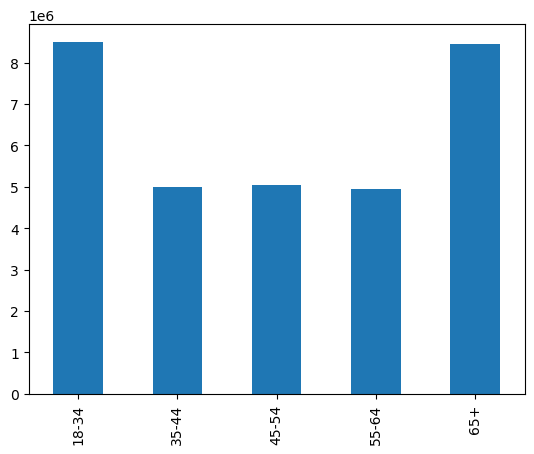

In [83]:
agegroup_bar = full_merge2['age_group'].value_counts().sort_index().plot.bar()

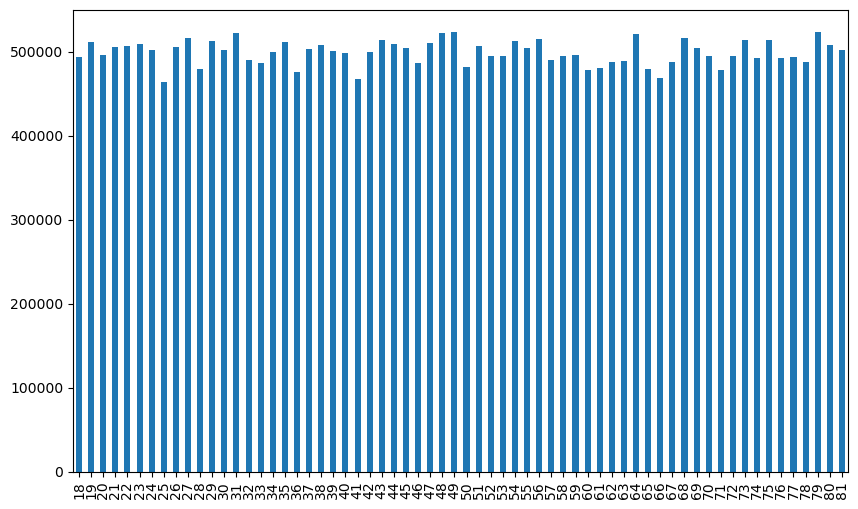

In [84]:
age_bar = full_merge2['age'].value_counts().sort_index().plot.bar(figsize=(10, 6))

In [85]:
age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_bar.png'))

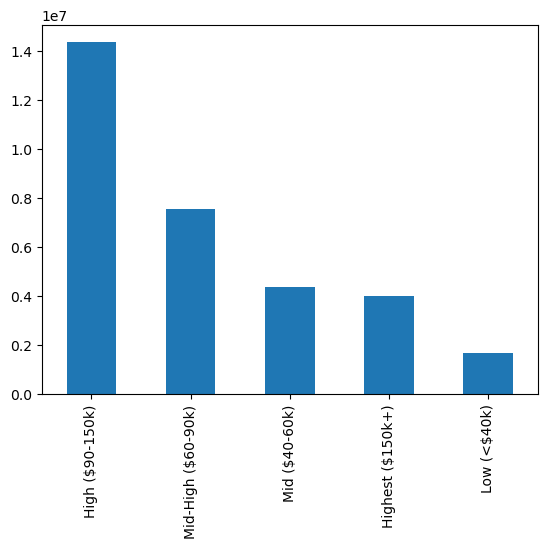

In [86]:
income_group_bar = full_merge2['income_group'].value_counts().plot.bar()

In [87]:
filtered_consumer_type = full_merge2[full_merge2['consumer_type'] != 'none']

In [88]:
filtered_consumer_type

,order_id,product_id,add_to_cart_order,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_prices_mean,spender_category,days_since_mean,frequency_flag,gender,state,age,date_joined,dependants_count,family_status,income,region,age_group,income_group,consumer_type,caregiver_flag,marketing_profile
2044,2224816,44471,36.0,166654,13.0,2.0,9.0,5.0,Free & Clear Unscented Baby Wipes,82,18,6.3,Mid-range product,Average days,Most orders,63.0,Loyal customer,7.302487,Low spender,6.140303,Frequent customer,Male,Mississippi,60,4/19/2019,3,married,115135,South,55-64,High ($90-150k),Baby caregiver,True,Middle-age Couple w/Dependents
2045,2838749,44471,41.0,166654,4.0,5.0,18.0,5.0,Free & Clear Unscented Baby Wipes,82,18,6.3,Mid-range product,Average days,Average orders,63.0,Loyal customer,7.302487,Low spender,6.140303,Frequent customer,Male,Mississippi,60,4/19/2019,3,married,115135,South,55-64,High ($90-150k),Baby caregiver,True,Middle-age Couple w/Dependents
2046,2873314,44471,26.0,166654,10.0,3.0,10.0,4.0,Free & Clear Unscented Baby Wipes,82,18,6.3,Mid-range product,Slowest days,Most orders,63.0,Loyal customer,7.302487,Low spender,6.140303,Frequent customer,Male,Mississippi,60,4/19/2019,3,married,115135,South,55-64,High ($90-150k),Baby caregiver,True,Middle-age Couple w/Dependents
2047,3268268,44471,16.0,166654,18.0,1.0,12.0,21.0,Free & Clear Unscented Baby Wipes,82,18,6.3,Mid-range product,Busiest days,Most orders,63.0,Loyal customer,7.302487,Low spender,6.140303,Frequent customer,Male,Mississippi,60,4/19/2019,3,married,115135,South,55-64,High ($90-150k),Baby caregiver,True,Middle-age Couple w/Dependents
2272,2751150,8630,1.0,166654,50.0,4.0,12.0,6.0,Baby Calendula Body Cream,102,18,11.2,Mid-range product,Slowest days,Most orders,63.0,Loyal customer,7.302487,Low spender,6.140303,Frequent customer,Male,Mississippi,60,4/19/2019,3,married,115135,South,55-64,High ($90-150k),Baby caregiver,True,Middle-age Couple w/Dependents
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32642366,133646,10148,1.0,162836,4.0,4.0,18.0,12.0,Superior Puerto Rican Rum,124,5,6.0,Mid-range product,Slowest days,Average orders,6.0,New customer,6.000000,Low spender,15.400000,Regular customer,Female,Texas,51,5/13/2019,2,married,48254,South,45-54,Mid ($40-60k),Drinker,True,Middle-age Couple w/Dependents
32642367,909947,10148,1.0,162836,2.0,6.0,11.0,21.0,Superior Puerto Rican Rum,124,5,6.0,Mid-range product,Average days,Most orders,6.0,New customer,6.000000,Low spender,15.400000,Regular customer,Female,Texas,51,5/13/2019,2,married,48254,South,45-54,Mid ($40-60k),Drinker,True,Middle-age Couple w/Dependents
32642368,1618173,10148,1.0,162836,3.0,6.0,23.0,7.0,Superior Puerto Rican Rum,124,5,6.0,Mid-range product,Average days,Fewest orders,6.0,New customer,6.000000,Low spender,15.400000,Regular customer,Female,Texas,51,5/13/2019,2,married,48254,South,45-54,Mid ($40-60k),Drinker,True,Middle-age Couple w/Dependents
32642369,1800496,10148,1.0,162836,1.0,6.0,11.0,NaN,Superior Puerto Rican Rum,124,5,6.0,Mid-range product,Average days,Most orders,6.0,New customer,6.000000,Low spender,15.400000,Regular customer,Female,Texas,51,5/13/2019,2,married,48254,South,45-54,Mid ($40-60k),Drinker,True,Middle-age Couple w/Dependents


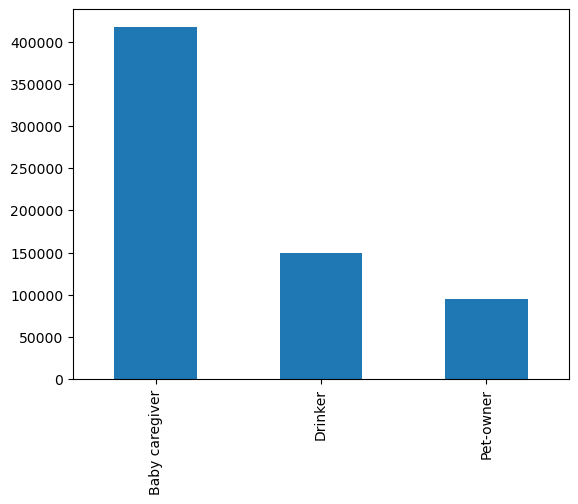

In [89]:
fct_bar = filtered_consumer_type['consumer_type'].value_counts().sort_index().plot.bar()

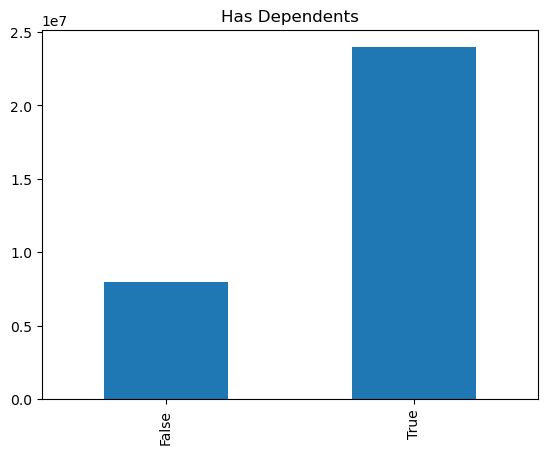

In [90]:
caregiver_bar = full_merge2['caregiver_flag'].value_counts().sort_index().plot.bar()
plt.title("Has Dependents")
plt.show()

In [91]:
full_merge2['caregiver_flag'].value_counts(dropna= True)

True     23951261
False     7979873
Name: caregiver_flag, dtype: int64

In [92]:
full_merge2.shape

(31931134, 34)

In [93]:
23951261 / 31931134

0.7500911492839559

75% of Instacart's orders are from those w/Dependents

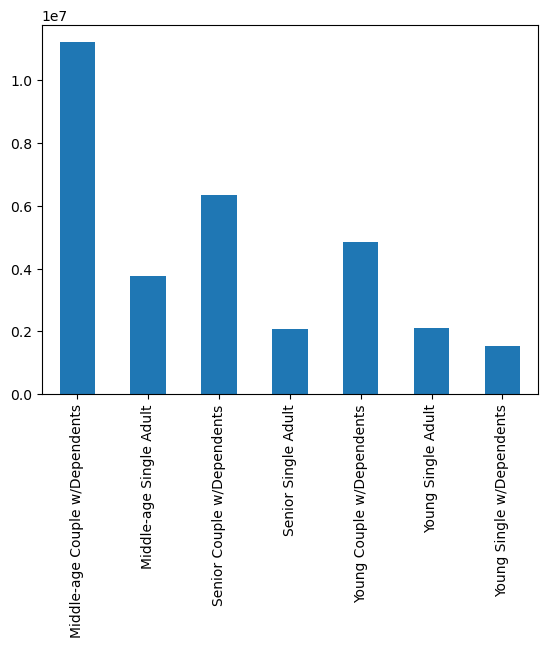

In [94]:
mpbar = full_merge2['marketing_profile'].value_counts().sort_index().plot.bar()

In this data, there are no Middle-Age nor Senior Single w/Dependents. Most of those in this data are caregivers, and this could make sense given they are the larger spenders. They also mostly are of quite high income. There are also generally more young people (18-34) and seniors (65+) then the categories in between. Of the consumer types, baby caregivers are the largest. All in all, alcohol and pet food purchases are not very high though.

In [95]:
# Now let's make some crosstabs to show some groups together, namely marketing profiles and income, and income and age

In [96]:
mp_ig_crosstab = pd.crosstab(full_merge2['marketing_profile'], full_merge2['income_group'], dropna = False)

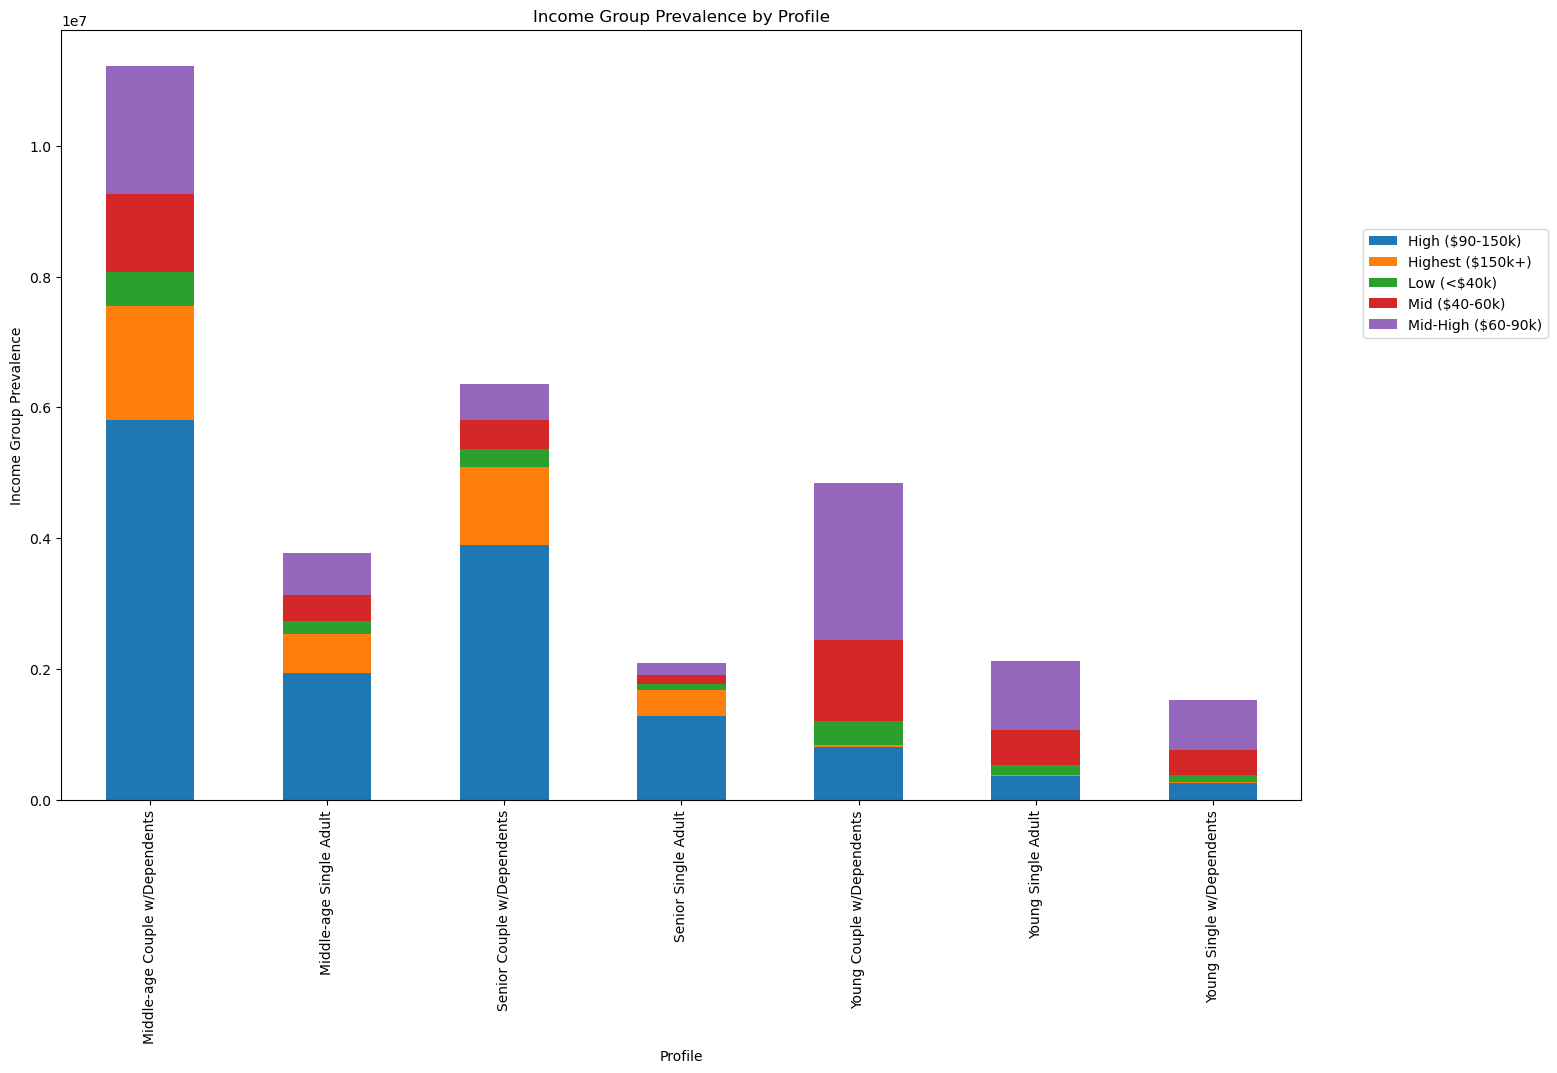

In [97]:
#specify stacked chart with all labels
mp_ig_chart = mp_ig_crosstab.plot.bar(stacked=True, figsize=(16, 10))
plt.legend(title='Profile')
plt.legend(loc=(1.05, 0.6))
plt.xlabel('Profile')
plt.ylabel('Income Group Prevalence')
plt.title('Income Group Prevalence by Profile')
plt.show()

The high level of income really makes itself clear here, as is the prominence of the Middle-age Couple w/Dependents. 

In [98]:
#let's look at how many of these are mid-high income+ w/Dependents
income_wdependent_df = full_merge2.loc[(full_merge2['income'] >= 60000) & (full_merge2['caregiver_flag'] == True), ['income', 'caregiver_flag']]

In [99]:
income_wdependent_df.shape

(19418345, 2)

In [100]:
income_wdependent_df.describe()

,income
count,1.941834e+07
mean,1.118491e+05
std,3.808953e+04
min,6.000000e+04
25%,8.503000e+04
50%,1.057780e+05
75%,1.360550e+05
max,5.939010e+05


In [101]:
full_merge2.shape

(31931134, 34)

In [102]:
19418345 / 31931134

0.6081320193639224

About 61% are w/dependents with income of $60,000+

In [103]:
crosstab_inc_age = pd.crosstab(full_merge2['age_group'], full_merge2['income_group'], dropna = False)

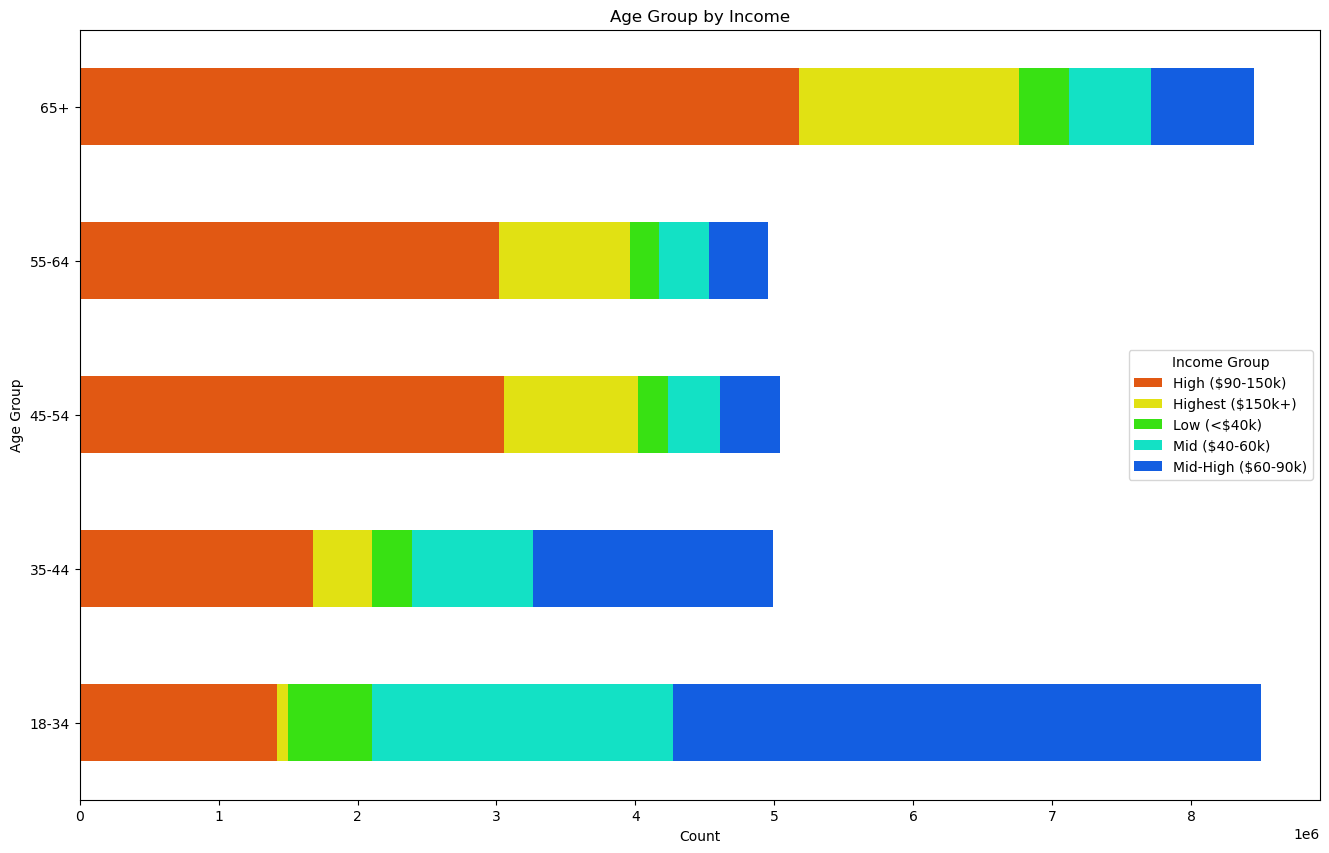

In [104]:
colors = ['#E15813', '#E1E113', '#38E113', '#13E1C5', '#135EE1', '#9913E1', '#E113BB', '#E1134E', '#160B0B']
#stacked bar graph
agegroupinc = crosstab_inc_age.plot.barh(stacked=True, color = colors, figsize=(16, 10))
#Titles and labels
agegroupinc.legend(title='Income Group'
                )
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.title('Age Group by Income')

plt.show()

The size of the high incomes and the lowest and highest age groups are also clear here too.

## 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [105]:
#sanity check
full_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31931134 entries, 0 to 32642449
Data columns (total 34 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                object 
 1   product_id              object 
 2   add_to_cart_order       float64
 3   user_id                 object 
 4   user_order_number       float64
 5   orders_day_of_week      float64
 6   order_hour_of_day       float64
 7   days_since_prior_order  float64
 8   product_name            object 
 9   aisle_id                object 
 10  department_id           object 
 11  prices                  float64
 12  price_range_loc         object 
 13  busiest_days            object 
 14  busiest_period_of_day   object 
 15  max_order               float64
 16  loyalty_flag            object 
 17  user_prices_mean        float64
 18  spender_category        object 
 19  days_since_mean         float64
 20  frequency_flag          object 
 21  gender                  objec

In [106]:
#sanity check
full_merge2.head()

,order_id,product_id,add_to_cart_order,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_prices_mean,spender_category,days_since_mean,frequency_flag,gender,state,age,date_joined,dependants_count,family_status,income,region,age_group,income_group,consumer_type,caregiver_flag,marketing_profile
0,2,33120,1.0,202279,3.0,5.0,9.0,8.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,55-64,High ($90-150k),none,True,Middle-age Couple w/Dependents
1,104690,33120,2.0,202279,8.0,6.0,10.0,30.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,55-64,High ($90-150k),none,True,Middle-age Couple w/Dependents
2,132412,33120,1.0,202279,6.0,5.0,9.0,30.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,55-64,High ($90-150k),none,True,Middle-age Couple w/Dependents
3,2808715,33120,1.0,202279,5.0,5.0,13.0,9.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,55-64,High ($90-150k),none,True,Middle-age Couple w/Dependents
4,2894949,33120,5.0,202279,1.0,5.0,9.0,NaN,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,55-64,High ($90-150k),none,True,Middle-age Couple w/Dependents


In [107]:
aggregatefm2 = full_merge2.groupby('marketing_profile').agg({'days_since_prior_order':['min', 'max', 'mean']}).reset_index()

In [108]:
aggregatefm2

marketing_profile days_since_prior_order                 
                                                     min   max       mean
0  Middle-age Couple w/Dependents                    0.0  30.0  11.031188
1         Middle-age Single Adult                    0.0  30.0  10.935447
2      Senior Couple w/Dependents                    0.0  30.0  10.987773
3             Senior Single Adult                    0.0  30.0  10.966624
4       Young Couple w/Dependents                    0.0  30.0  11.013632
5              Young Single Adult                    0.0  30.0  11.079259
6       Young Single w/Dependents                    0.0  30.0  10.946781

In [109]:
aggregatefm3 = full_merge2.groupby('marketing_profile').agg({'prices':['min', 'max', 'mean']}).reset_index()

In [110]:
aggregatefm3

marketing_profile prices                
                                     min   max      mean
0  Middle-age Couple w/Dependents    1.0  25.0  7.791680
1         Middle-age Single Adult    1.0  25.0  7.787661
2      Senior Couple w/Dependents    1.0  25.0  7.794859
3             Senior Single Adult    1.0  25.0  7.801549
4       Young Couple w/Dependents    1.0  25.0  7.782800
5              Young Single Adult    1.0  25.0  7.781447
6       Young Single w/Dependents    1.0  25.0  7.800658

All very similar.

# 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [111]:
# Will make a subset first

In [112]:
mp_region = full_merge2[['marketing_profile', 'region']]

In [113]:
mp_region.head()

,marketing_profile,region
0,Middle-age Couple w/Dependents,West
1,Middle-age Couple w/Dependents,West
2,Middle-age Couple w/Dependents,West
3,Middle-age Couple w/Dependents,West
4,Middle-age Couple w/Dependents,West


In [114]:
mp_region_dep = full_merge2[['marketing_profile', 'region', 'department_id']]

In [115]:
mp_region_dep.head()

,marketing_profile,region,department_id
0,Middle-age Couple w/Dependents,West,16
1,Middle-age Couple w/Dependents,West,16
2,Middle-age Couple w/Dependents,West,16
3,Middle-age Couple w/Dependents,West,16
4,Middle-age Couple w/Dependents,West,16


In [116]:
# create a crosstab for a stacked bar chart using pandas this time
region_mp_crosstab = pd.crosstab(mp_region_dep['region'], mp_region_dep['marketing_profile'])

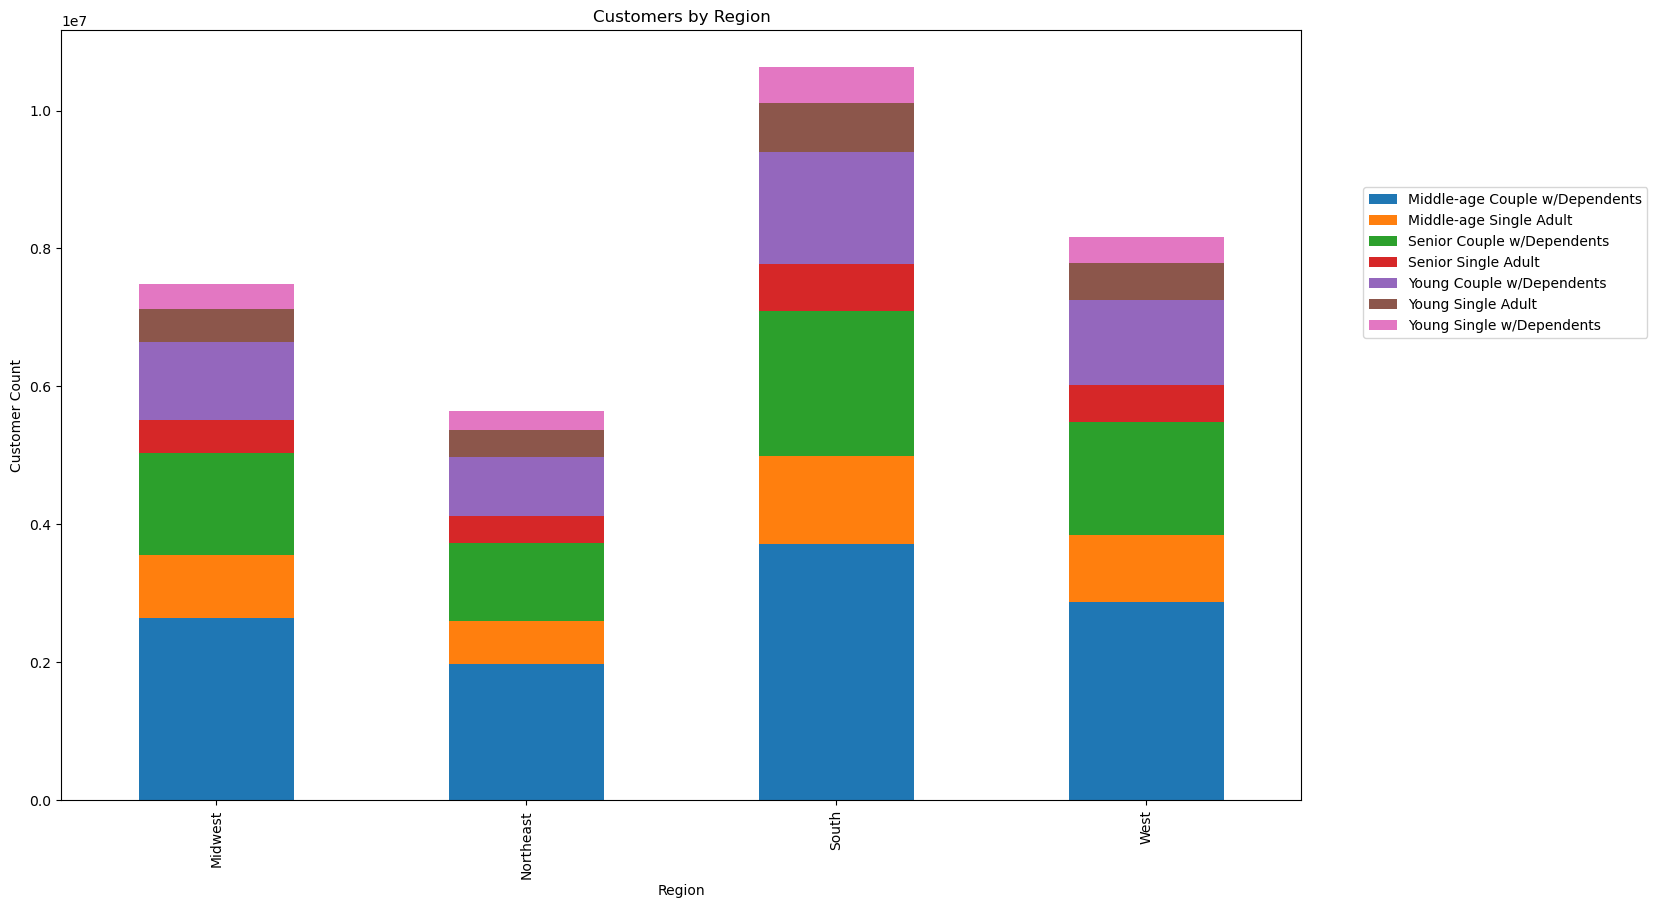

In [117]:
#specify stacked chart with all labels


chart_region_mp_crosstab = region_mp_crosstab.plot.bar(stacked=True, figsize=(16, 10))
plt.legend(title='Marketing Profile')
plt.legend(loc=(1.05, 0.6))
plt.xlabel('Region')
plt.ylabel('Customer Count')
plt.title('Customers by Region')
plt.show()

This all looks very proportional between the regions.

In [118]:
# to add the department labels, I will join the subset based on the dictionary
# dep_data is the dictionary, called above

In [119]:
mp_region_dep.shape

(31931134, 3)

In [120]:
mp_region_dep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31931134 entries, 0 to 32642449
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   marketing_profile  object
 1   region             object
 2   department_id      object
dtypes: object(3)
memory usage: 974.5+ MB


In [121]:
mp_region_dep.describe()

,marketing_profile,region,department_id
count,31931134,31931134,31931134
unique,7,4,22
top,Middle-age Couple w/Dependents,South,4
freq,11213969,10634704,9288860


In [122]:
dep_data.head()

,department
0,frozen
1,other
2,bakery
3,produce
4,alcohol


In [123]:
dep_data = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [124]:
dep_data

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [125]:
dep_data.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [126]:
dep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [127]:
dep_data['department_id'] = dep_data['department_id'].astype('str')

In [128]:
mp_region_dep2 = mp_region_dep.merge(dep_data, on = 'department_id', how = 'left')

In [129]:
mp_region_dep2

,marketing_profile,region,department_id,department
0,Middle-age Couple w/Dependents,West,16,dairy eggs
1,Middle-age Couple w/Dependents,West,16,dairy eggs
2,Middle-age Couple w/Dependents,West,16,dairy eggs
3,Middle-age Couple w/Dependents,West,16,dairy eggs
4,Middle-age Couple w/Dependents,West,16,dairy eggs
...,...,...,...,...
31931129,Young Couple w/Dependents,South,12,meat seafood
31931130,Young Couple w/Dependents,South,12,meat seafood
31931131,Young Couple w/Dependents,South,12,meat seafood
31931132,Young Couple w/Dependents,South,12,meat seafood


In [130]:
mp_region_dep2.shape

(31931134, 4)

In [131]:
# create a crosstab for a stacked bar chart using pandas
department_mp_crosstab = pd.crosstab(mp_region_dep2['department'], mp_region_dep['marketing_profile'])

In [132]:
# get stats
department_mp_crosstab

marketing_profile,Middle-age Couple w/Dependents,Middle-age Single Adult,Senior Couple w/Dependents,Senior Single Adult,Young Couple w/Dependents,Young Single Adult,Young Single w/Dependents
department,,,,,,,
alcohol,49353,17559,30205,10117,20844,9812,6335
babies,144450,48694,83077,26686,62372,26204,19018
bakery,394442,131903,225792,73801,171589,74872,53690
beverages,904639,302005,515943,169148,385147,171461,124128
breakfast,236867,79493,134246,44297,102124,44695,32435
bulk,12404,3965,6535,2008,4853,2213,1553
canned goods,358739,120924,201357,67817,154515,69223,48466
dairy eggs,1827058,613251,1032009,338392,788780,345346,248979
deli,354218,120145,201201,65540,153580,67398,47713


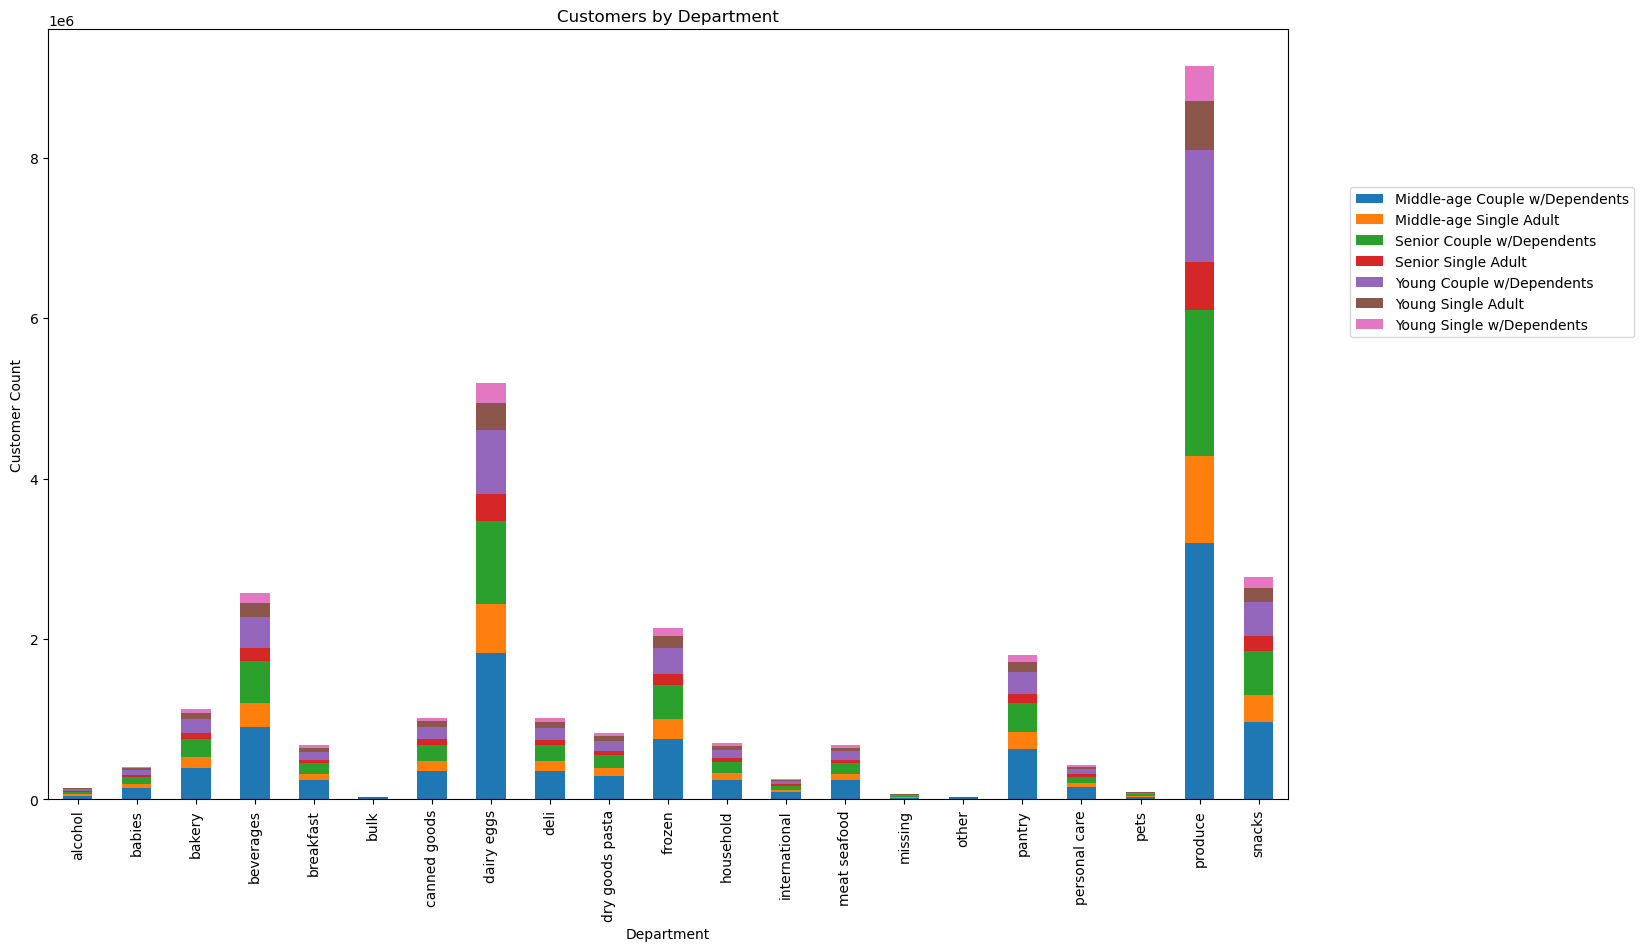

In [133]:
#specify stacked chart with all labels
department_mp_crosstab2 = department_mp_crosstab.plot.bar(stacked=True, figsize=(16, 10))
plt.legend(title='Marketing Profile')
plt.legend(loc=(1.05, 0.6))
plt.xlabel('Department')
plt.ylabel('Customer Count')
plt.title('Customers by Department')
plt.show()

Only Middle-age people buy alcohol.

There are single Middle|-age adults and single seniors who buy baby products, who have no dependents

Pets, bulk, babies, and alcohol are tiny categories here.

Dairy eggs, and produce are by far the two largest categories while the meat/seafood is pretty tiny, which could suggest that these customers are more likely to be vegetarian. However the canned goods and frozen departments are also sizable, and would best be broken down into further categories in order to make the best judgment there.

# Visualizations for other key questions

## Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts. 

In [134]:
full_merge2['price_range_loc'].value_counts(dropna= True)

Mid-range product     21400207
Low-range product      9910739
High-range product      408336
nan                     211852
Name: price_range_loc, dtype: int64

In [135]:
#re-apply price_label: this seems to have been done

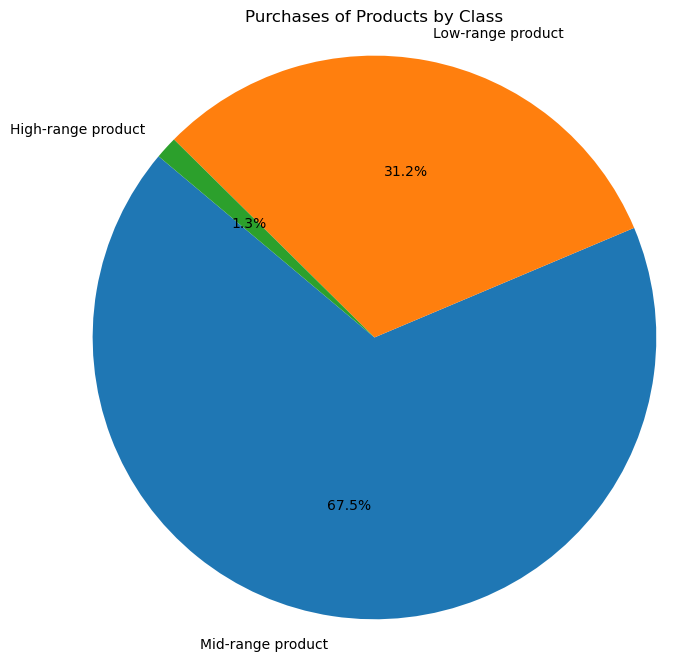

In [136]:
# pie chart for this one

price_label_pie = full_merge2['price_range_loc']

# make nan NaN again
price_label_pie.replace('nan', np.nan, inplace=True)

# So that we drop nan. It's not relevant due to size, and namely just confusing
price_label_pie = price_label_pie.dropna()

price_label_pie = price_label_pie.value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  
plt.pie(price_label_pie, labels=price_label_pie.index, autopct='%1.1f%%', startangle=140)
plt.title('Purchases of Products by Class')
plt.axis('equal') 
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_label_pie.png'))
plt.show()

In [137]:
# create a crosstab for a stacked bar chart using pandas
price_range_cross = pd.crosstab(full_merge2['marketing_profile'], full_merge2['price_range_loc'])

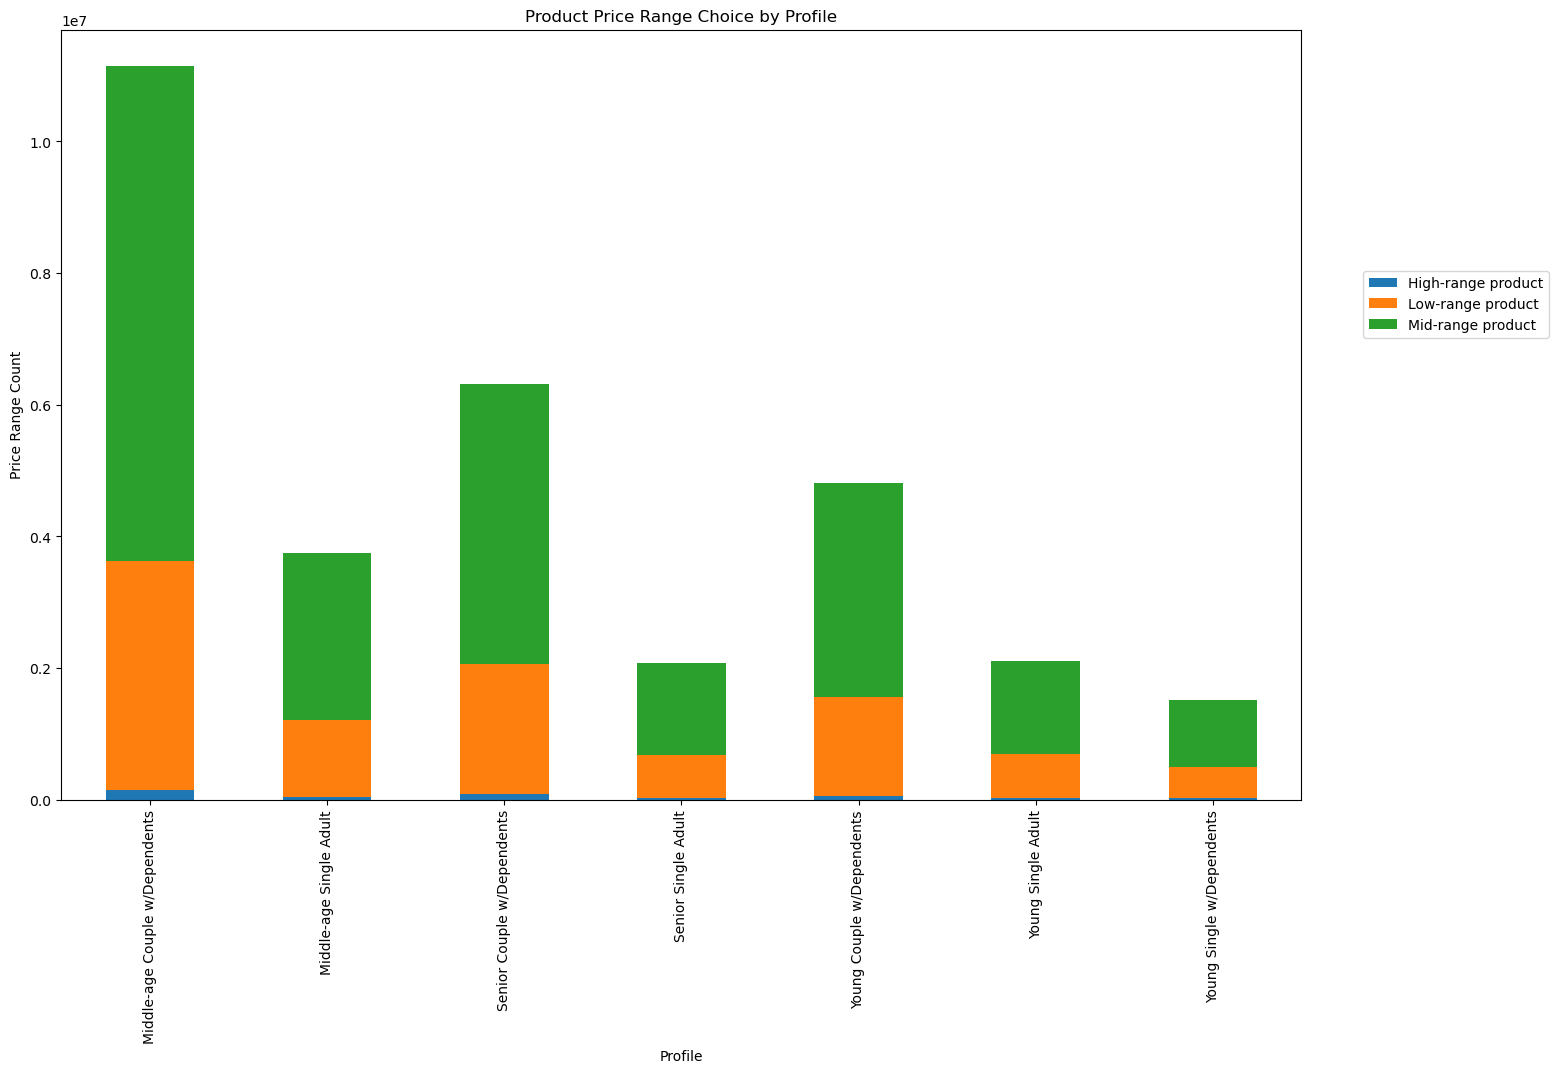

In [138]:
#specify stacked chart with all labels
price_range_cross_chart = price_range_cross.plot.bar(stacked=True, figsize=(16, 10))
plt.legend(title='Product Price Range Choice by Profile')
plt.legend(loc=(1.05, 0.6))
plt.xlabel('Profile')
plt.ylabel('Price Range Count')
plt.title('Product Price Range Choice by Profile')
plt.show()

In [139]:
full_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31931134 entries, 0 to 32642449
Data columns (total 34 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                object 
 1   product_id              object 
 2   add_to_cart_order       float64
 3   user_id                 object 
 4   user_order_number       float64
 5   orders_day_of_week      float64
 6   order_hour_of_day       float64
 7   days_since_prior_order  float64
 8   product_name            object 
 9   aisle_id                object 
 10  department_id           object 
 11  prices                  float64
 12  price_range_loc         object 
 13  busiest_days            object 
 14  busiest_period_of_day   object 
 15  max_order               float64
 16  loyalty_flag            object 
 17  user_prices_mean        float64
 18  spender_category        object 
 19  days_since_mean         float64
 20  frequency_flag          object 
 21  gender                  objec

In [140]:
full_merge2.head()

,order_id,product_id,add_to_cart_order,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_prices_mean,spender_category,days_since_mean,frequency_flag,gender,state,age,date_joined,dependants_count,family_status,income,region,age_group,income_group,consumer_type,caregiver_flag,marketing_profile
0,2,33120,1.0,202279,3.0,5.0,9.0,8.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,55-64,High ($90-150k),none,True,Middle-age Couple w/Dependents
1,104690,33120,2.0,202279,8.0,6.0,10.0,30.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,55-64,High ($90-150k),none,True,Middle-age Couple w/Dependents
2,132412,33120,1.0,202279,6.0,5.0,9.0,30.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,55-64,High ($90-150k),none,True,Middle-age Couple w/Dependents
3,2808715,33120,1.0,202279,5.0,5.0,13.0,9.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,55-64,High ($90-150k),none,True,Middle-age Couple w/Dependents
4,2894949,33120,5.0,202279,1.0,5.0,9.0,NaN,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,55-64,High ($90-150k),none,True,Middle-age Couple w/Dependents


## Is there a connection between age and family status in terms of ordering habits?

In [141]:
# create a crosstab for a stacked bar chart using pandas
mp_department_crosstab = pd.crosstab(mp_region_dep2['marketing_profile'], mp_region_dep2['department'])

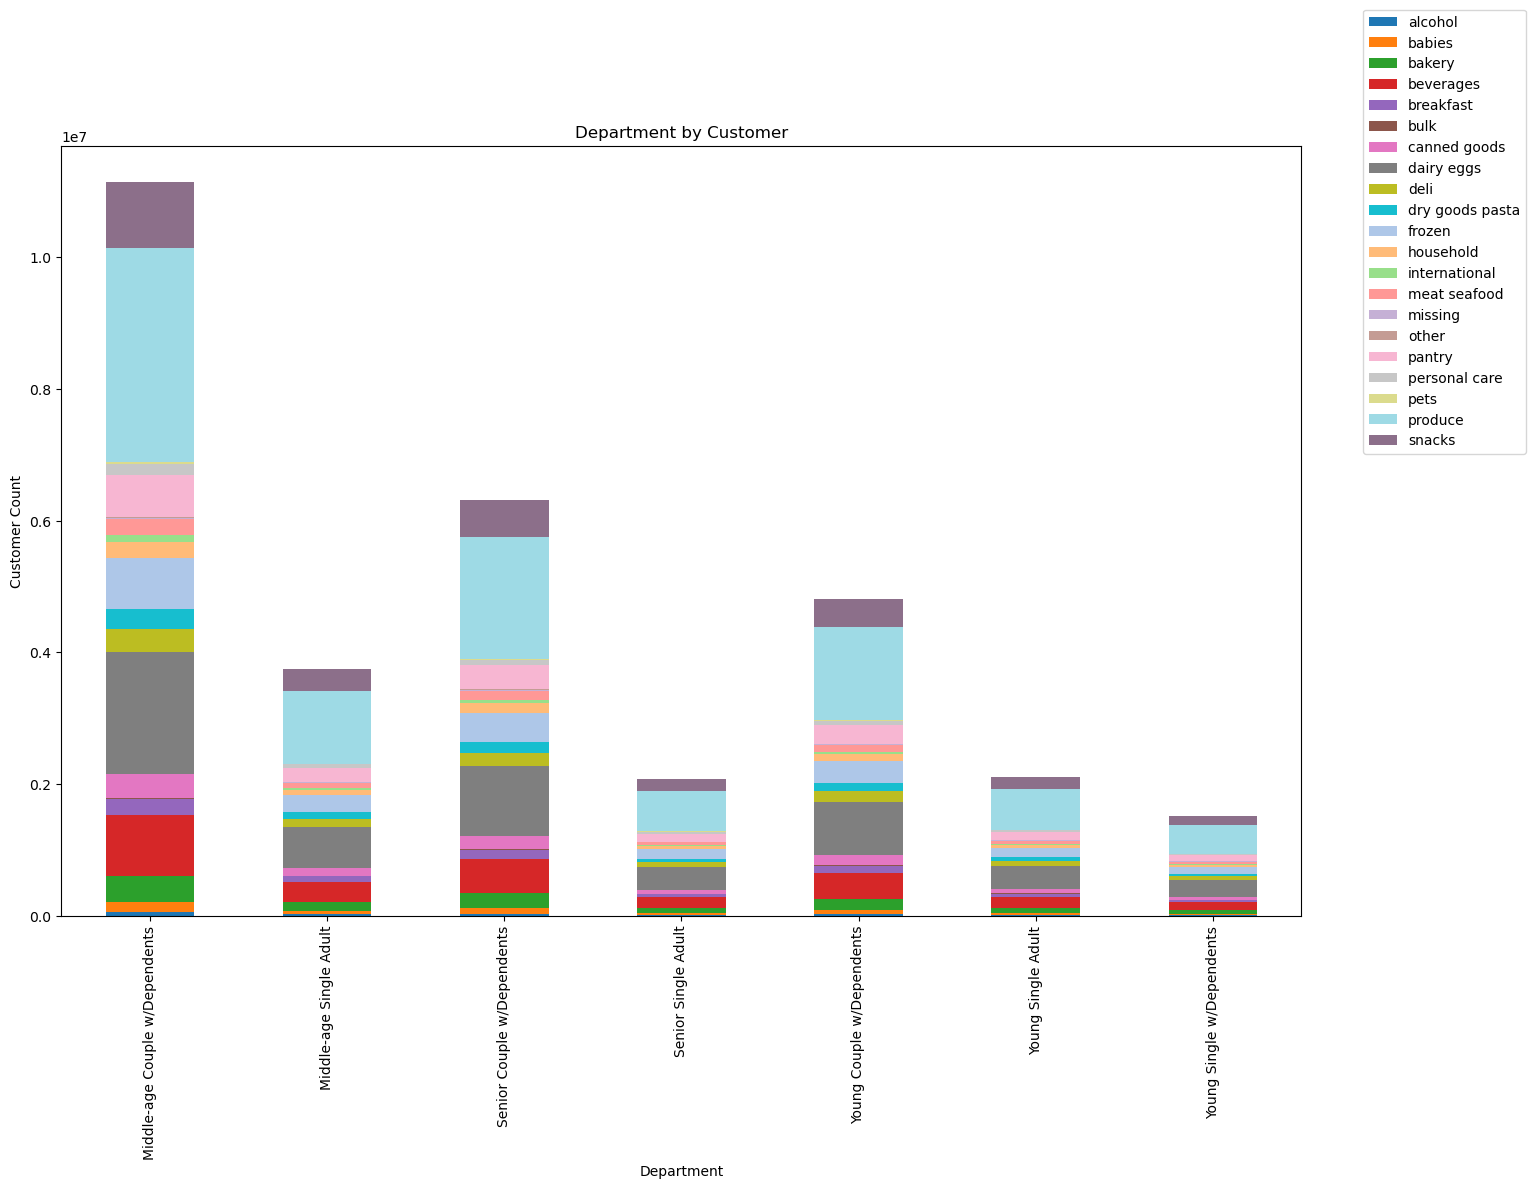

In [142]:
color_palette = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5',
    '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5',
    '#8c6f8a']

mp_department_graph = mp_department_crosstab.plot.bar(stacked=True, figsize=(16, 10), color=color_palette)
plt.legend(title='Department')
plt.legend(loc=(1.05, 0.6))
plt.xlabel('Department')
plt.ylabel('Customer Count')
plt.title('Department by Customer')
plt.show()

## What differences can you find in ordering habits of different customer profiles? Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of. 

In [143]:
# create a crosstab for a stacked bar chart using pandas for the price ranges of orders
mp_price_crosstab = pd.crosstab(mp_region_dep['marketing_profile'], full_merge2['price_range_loc'])

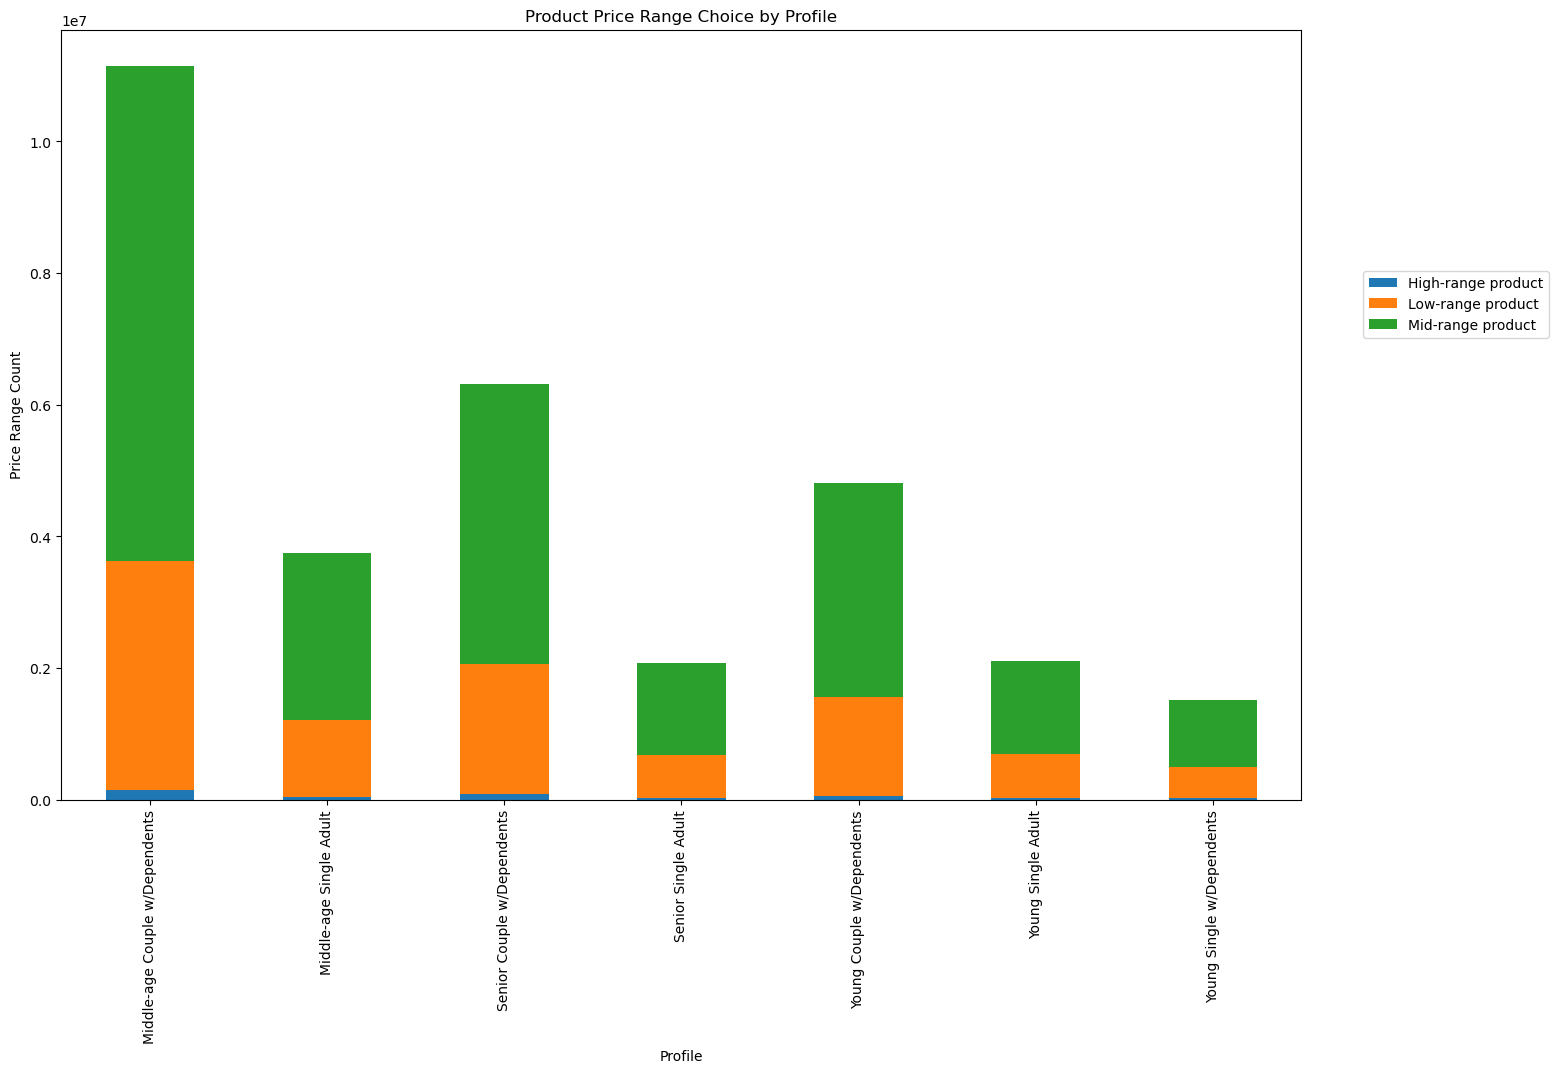

In [144]:
#specify stacked chart with all labels
mp_price_chart = mp_price_crosstab.plot.bar(stacked=True, figsize=(16, 10))
plt.legend(title='Product Price Range Choice by Profile')
plt.legend(loc=(1.05, 0.6))
plt.xlabel('Profile')
plt.ylabel('Price Range Count')
plt.title('Product Price Range Choice by Profile')
plt.show()

In [145]:
# create a crosstab for a stacked bar chart using pandas for the frequency of orders
mp_frequency_crosstab = pd.crosstab(mp_region_dep['marketing_profile'], full_merge2['frequency_flag'])

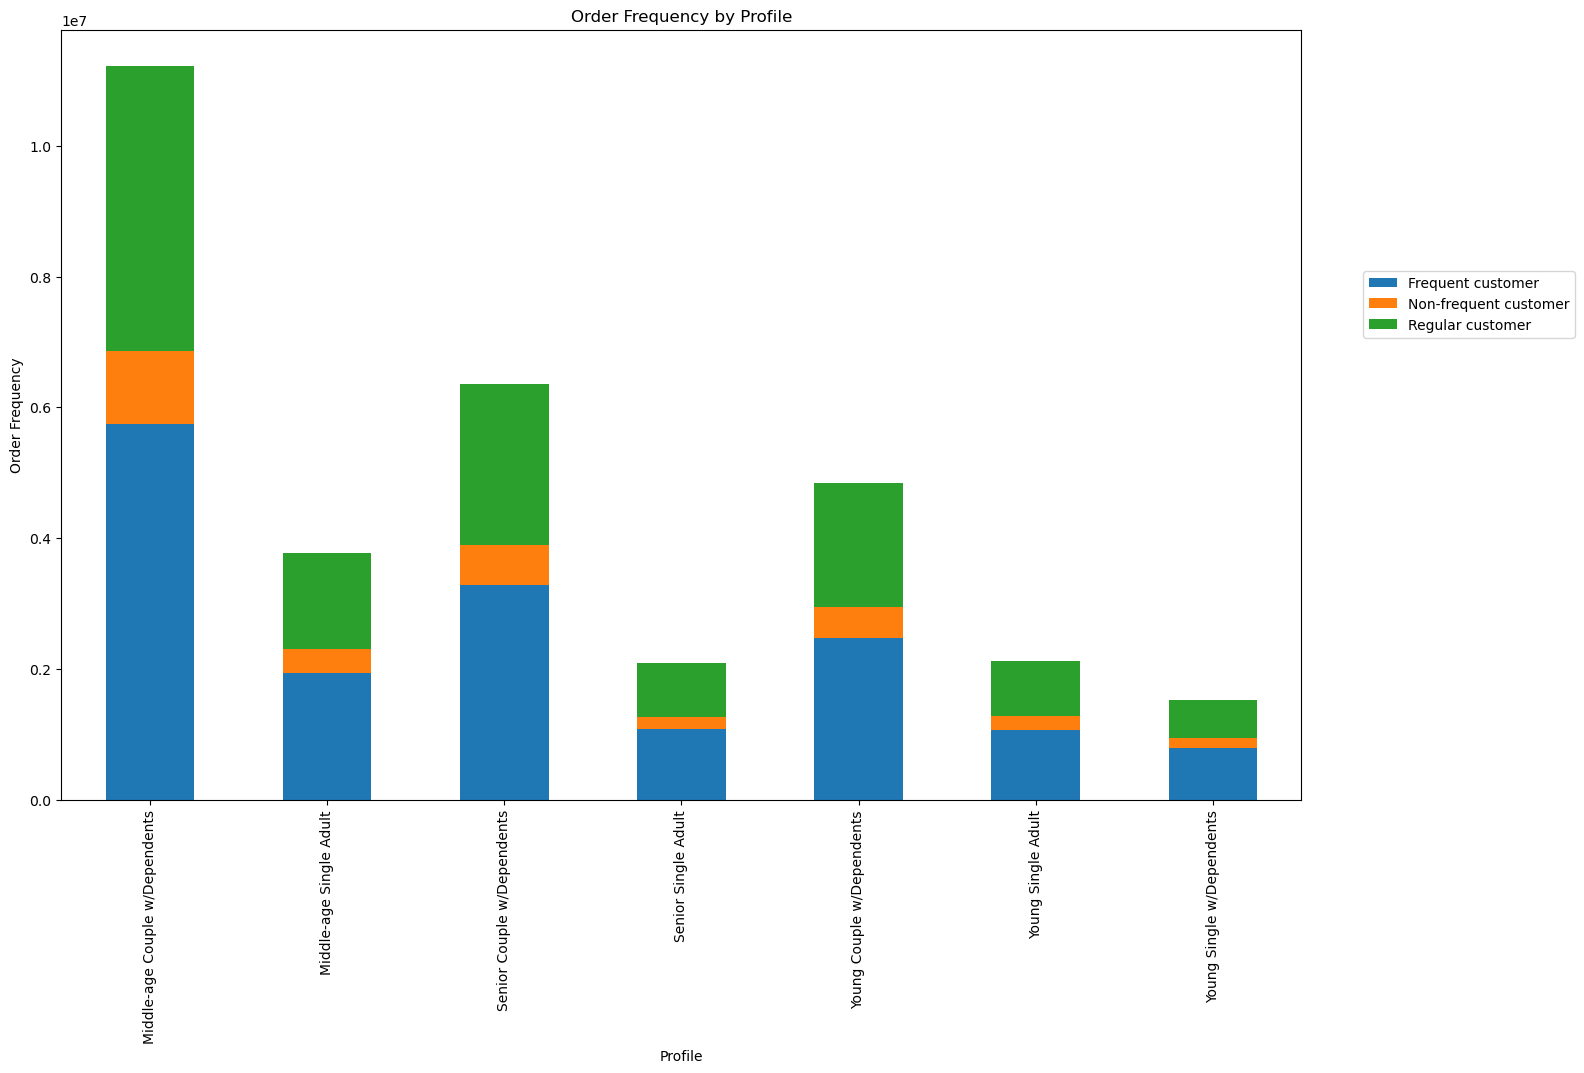

In [146]:
#specify stacked chart with all labels
mp_frequency_chart = mp_frequency_crosstab.plot.bar(stacked=True, figsize=(16, 10))
plt.legend(title='Profile')
plt.legend(loc=(1.05, 0.6))
plt.xlabel('Profile')
plt.ylabel('Order Frequency')
plt.title('Order Frequency by Profile')
plt.show()

In [147]:
# create a crosstab for a stacked bar chart using pandas for the busiest_days  
mp_bd_crosstab = pd.crosstab(mp_region_dep['marketing_profile'], full_merge2['frequency_flag'])

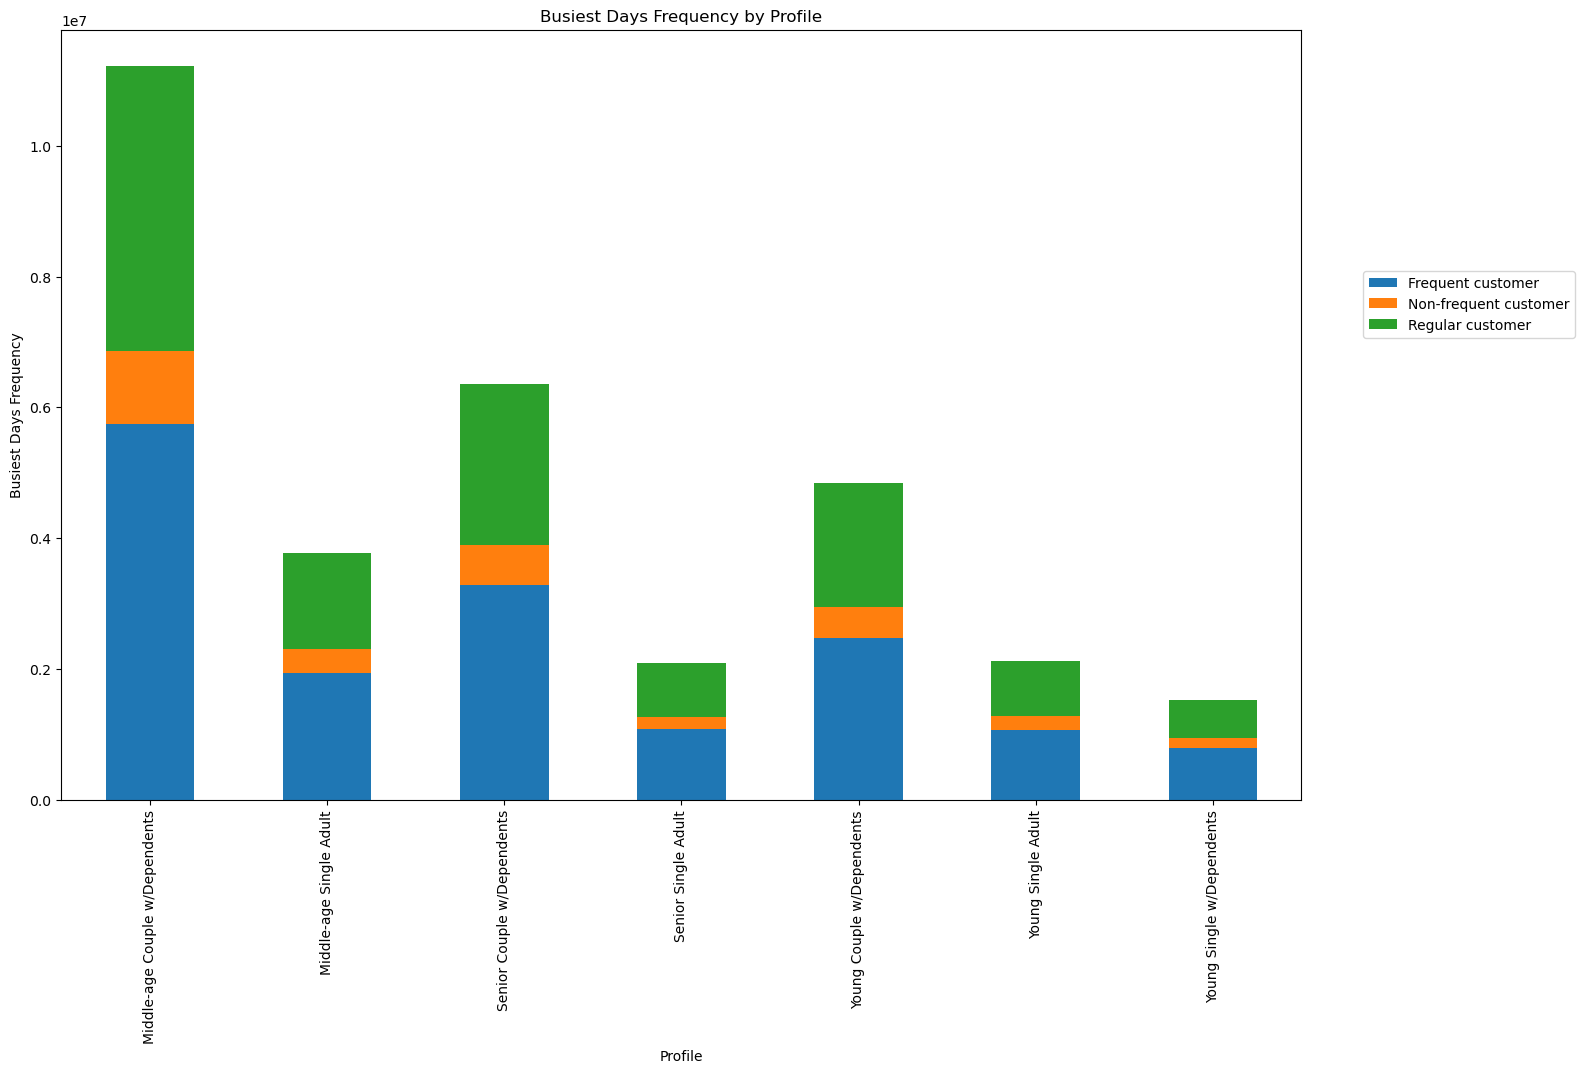

In [148]:
#specify stacked chart with all labels
mp_bd_chart = mp_bd_crosstab.plot.bar(stacked=True, figsize=(16, 10))
plt.legend(title='Profile')
plt.legend(loc=(1.05, 0.6))
plt.xlabel('Profile')
plt.ylabel('Busiest Days Frequency')
plt.title('Busiest Days Frequency by Profile')
plt.show()

## Are there differences in ordering habits based on a customer’s loyalty status? 

In [149]:
full_merge2.head()

,order_id,product_id,add_to_cart_order,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_prices_mean,spender_category,days_since_mean,frequency_flag,gender,state,age,date_joined,dependants_count,family_status,income,region,age_group,income_group,consumer_type,caregiver_flag,marketing_profile
0,2,33120,1.0,202279,3.0,5.0,9.0,8.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,55-64,High ($90-150k),none,True,Middle-age Couple w/Dependents
1,104690,33120,2.0,202279,8.0,6.0,10.0,30.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,55-64,High ($90-150k),none,True,Middle-age Couple w/Dependents
2,132412,33120,1.0,202279,6.0,5.0,9.0,30.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,55-64,High ($90-150k),none,True,Middle-age Couple w/Dependents
3,2808715,33120,1.0,202279,5.0,5.0,13.0,9.0,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,55-64,High ($90-150k),none,True,Middle-age Couple w/Dependents
4,2894949,33120,5.0,202279,1.0,5.0,9.0,NaN,Organic Egg Whites,86,16,11.3,Mid-range product,Average days,Most orders,9.0,New customer,8.618889,Low spender,21.962963,Non-frequent customer,Male,Idaho,57,2/6/2020,3,married,98119,West,55-64,High ($90-150k),none,True,Middle-age Couple w/Dependents


In [150]:
# create a crosstab for a stacked bar chart using pandas for the loyalty flag and the purchase habits 
loyalty_dep_crosstab = pd.crosstab(full_merge2['loyalty_flag'], mp_region_dep2['department'])

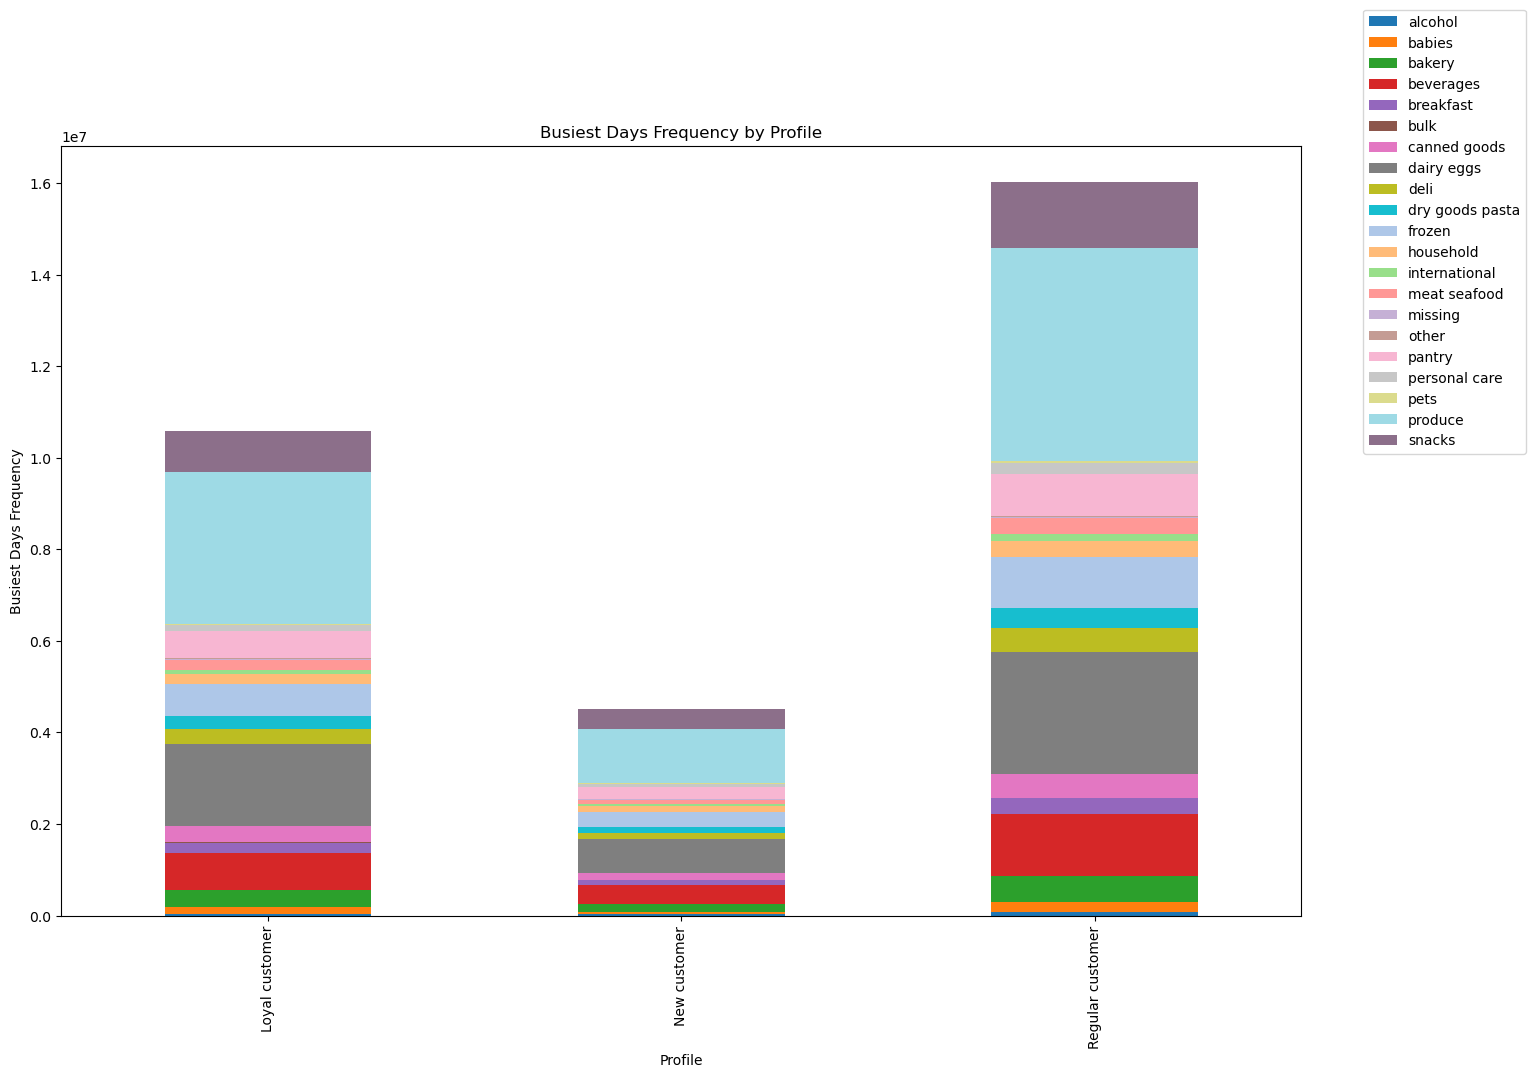

In [151]:
#specify stacked chart with all labels
color_palette = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5',
    '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5',
    '#8c6f8a']

loyalty_dep_chart = loyalty_dep_crosstab.plot.bar(stacked=True, figsize=(16, 10), color = color_palette)
plt.legend(title='Profile')
plt.legend(loc=(1.05, 0.6))
plt.xlabel('Profile')
plt.ylabel('Busiest Days Frequency')
plt.title('Busiest Days Frequency by Profile')
plt.show()

In [152]:
# export visualizations

regionspenders.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'regionspenders.png'), bbox_inches='tight')
agegroup_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'agegroup_bar.png'), bbox_inches='tight')
income_group_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_group_bar.png'), bbox_inches='tight')
fct_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fct_bar.png'), bbox_inches='tight')
caregiver_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'caregiver_bar.png'), bbox_inches='tight')
mpbar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'mpbar.png'), bbox_inches='tight')
agegroupinc.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'agegroupinc.png'), bbox_inches='tight')
chart_region_mp_crosstab.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'chart_region_mp_crosstab.png'), bbox_inches='tight')
department_mp_crosstab2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_mp_crosstab.png'), bbox_inches='tight')
price_range_cross_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_range_cross_chart.png'), bbox_inches='tight')
mp_department_graph.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'mp_department_graph.png'), bbox_inches='tight')
mp_price_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'mp_price_chart.png'), bbox_inches='tight')
mp_frequency_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'mp_frequency_chart.png'), bbox_inches='tight')
mp_bd_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'mp_bd_chart.png'), bbox_inches='tight')
mp_ig_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'mp_ig_chart.png'), bbox_inches='tight')
loyalty_dep_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_dep_chart.png'), bbox_inches='tight')

In [153]:
#export dataset
full_merge2.to_pickle(os.path.join(path, '02 Data','Prepared Data', '2023-08-03_full_merge.pkl'))